In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [102]:
datapath = "D:\\Dati_DSO\\FCC\\202312141732_LED_CAENAMP_Gain28"

In [103]:
df = pd.read_csv(datapath, sep=" ", names=['Time', 'C1', 'Time1', 'C2'])
df

Time      C1         Time1            C2
1.0    -3.500000e-07  0.0010 -3.500000e-07  1.200000e-03
1.0    -3.490000e-07  0.0006 -3.490000e-07  8.000000e-04
1.0    -3.480000e-07  0.0006 -3.480000e-07 -3.469447e-18
1.0    -3.470000e-07  0.0006 -3.470000e-07 -4.000000e-04
1.0    -3.460000e-07  0.0006 -3.460000e-07 -4.000000e-04
...              ...     ...           ...           ...
2797.0  3.450000e-07 -0.0002  3.450000e-07 -4.000000e-04
2797.0  3.460000e-07 -0.0002  3.460000e-07 -4.000000e-04
2797.0  3.470000e-07 -0.0002  3.470000e-07  4.000000e-04
2797.0  3.480000e-07  0.0002  3.480000e-07  4.000000e-04
2797.0  3.490000e-07  0.0002  3.490000e-07  8.000000e-04

[1957900 rows x 4 columns]

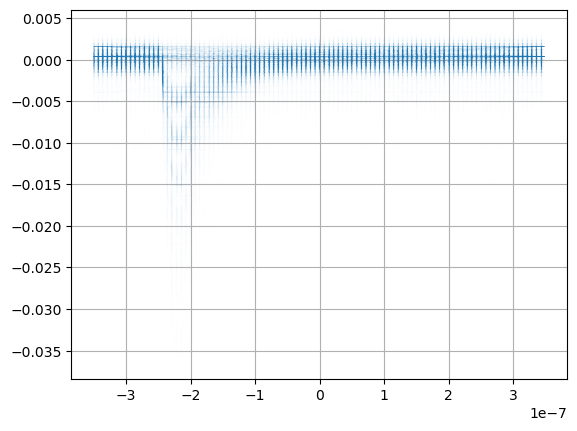

In [95]:
#dd = df.query('frame==100')
plt.plot(df.Time, df.C2, lw=0.0004)
plt.grid()

In [98]:
dd = df.query('frame==200')
plt.plot(dd.Time, dd.C2, lw=1)
plt.xlim(-4E-7, 0)
plt.grid()

UndefinedVariableError: name 'frame' is not defined

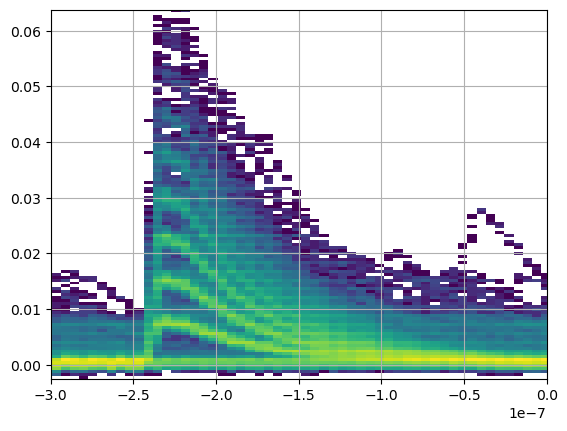

In [97]:
#dd = df.query('frame==100')
import matplotlib as mlp
plt.hist2d(df.Time, df.C1,  bins=125, norm=mlp.colors.LogNorm())
plt.grid()
plt.xlim(-3E-7, 0)
plt.show()

In [46]:
CH2 = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    CH2+=[np.max(np.abs(d.C2))]
CH2 = np.array(CH2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


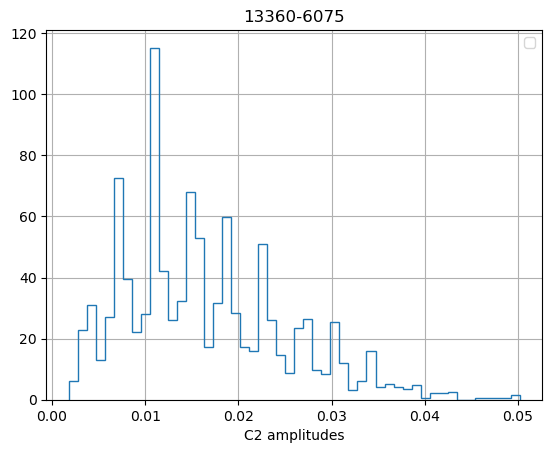

In [47]:
plt.hist(CH2, bins=50, density=True, histtype='step')

plt.legend()
#plt.yscale('log')
plt.xlabel('C2 amplitudes')
plt.title('13360-6075')
plt.grid()
plt.show()

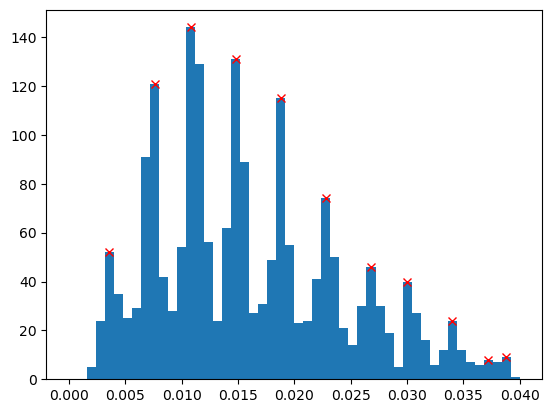

In [54]:
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

def func(x, a, b):
    return a + b*x

histogram_data, bin_edge, patch = plt.hist(CH2, range=[0, 0.04], bins=50)
bin_centres = bin_edge[:-1]+(bin_edge[1:]-bin_edge[:-1])/2
peaks, _ = find_peaks(histogram_data, distance=2)#, height=thr)
plt.plot(bin_centres[peaks], histogram_data[peaks], "x", color='red', label='detected peaks')


C:\Users\Belle2\AppData\Local\Temp\ipykernel_4800\1109556295.py:14: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


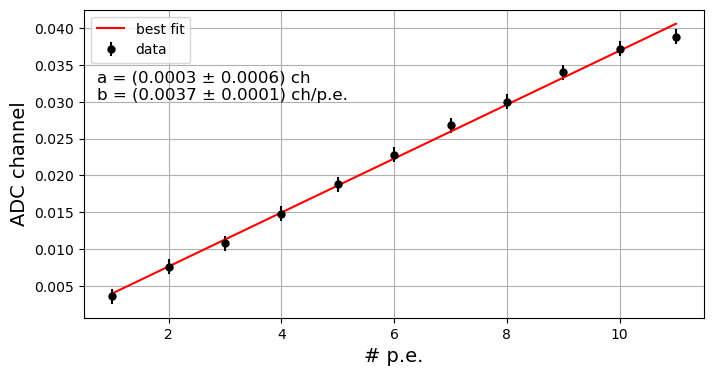

In [62]:
plt.figure(figsize=(8,4))
ADC_peaks = bin_centres[peaks]
ADC_peaks_err = ADC_peaks/ADC_peaks*0.001
pe = np.arange(len(ADC_peaks))+1
plt.errorbar(pe, ADC_peaks, yerr=ADC_peaks_err, color='black', ls='None', marker='o', markersize=5, label='data')
popt, pcov = curve_fit(func, pe, ADC_peaks, p0=[2, 1], sigma=ADC_peaks_err, absolute_sigma=True)
a, b = popt[0], popt[1]
var_a, cov_ab, var_b = pcov[0,0], pcov[0,1], pcov[1,1]
y_fit = func(pe, a, b)
plt.plot(pe, y_fit, color='red', label='best fit')
plt.grid()
A = 'a = ({:.4f} ± {:.4f}) ch'.format(popt[0],np.sqrt(pcov[0,0]))
B = 'b = ({:.4f} ± {:.4f}) ch/p.e.'.format(popt[1],np.sqrt(pcov[1,1]))
plt.annotate(A+'\n'+B,
        xy=(0.02, 0.8), xycoords='axes fraction',
        ha='left', va='top', textcoords='offset points', fontsize=12)
plt.xlabel('# p.e.', size=14)
plt.ylabel('ADC channel', size=14)
plt.legend()
#plt.savefig(f'plots/calibrations/calibration_{SiPM}.png', bbox_inches='tight', dpi = 150)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


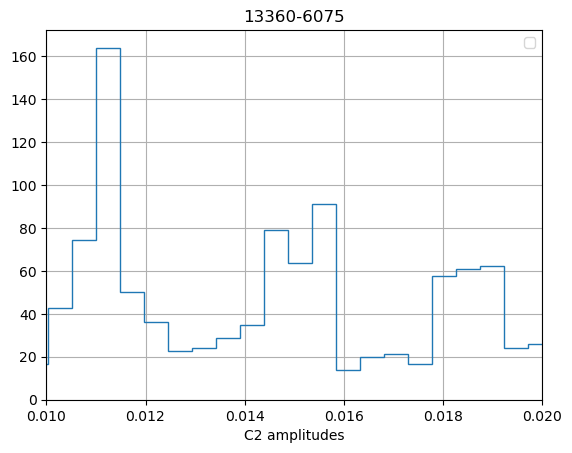

In [39]:
plt.hist(CH2, bins=100, density=True, histtype='step')

plt.legend()
#plt.yscale('log')
plt.xlabel('C2 amplitudes')
plt.title('13360-6075')
#plt.yscale('log')
plt.grid()
plt.xlim(0.01, 0.02)
plt.show()

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


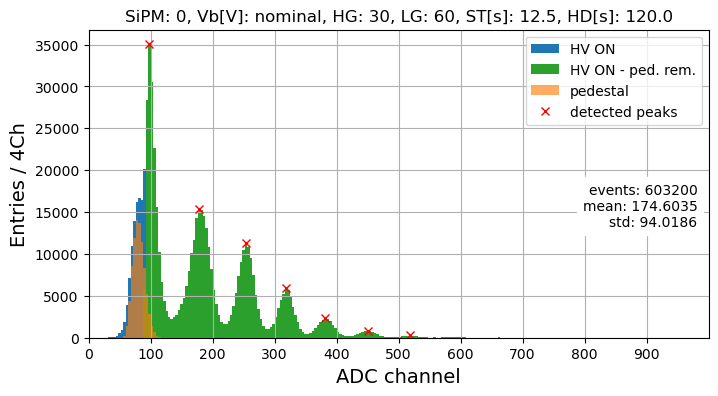

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


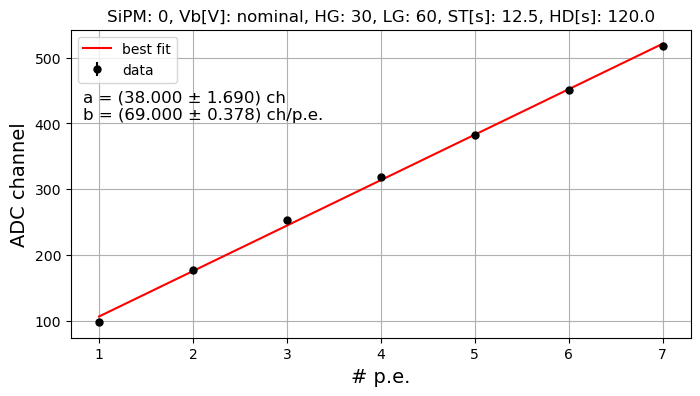

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


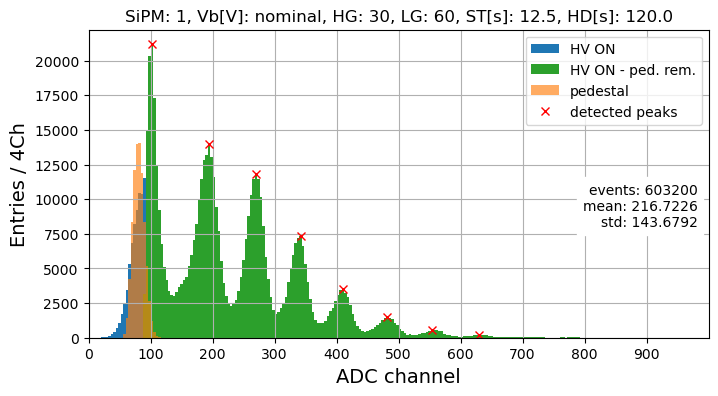

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


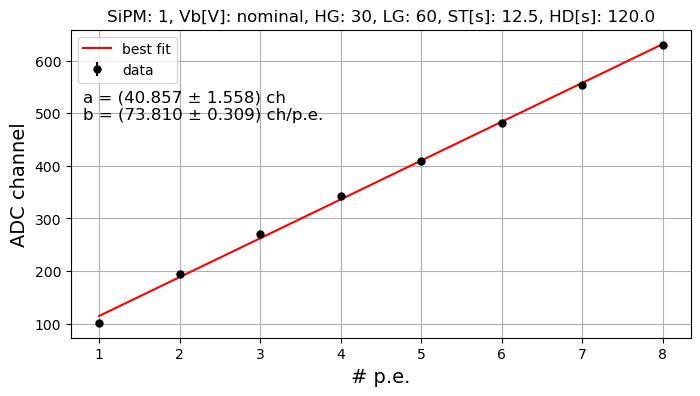

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


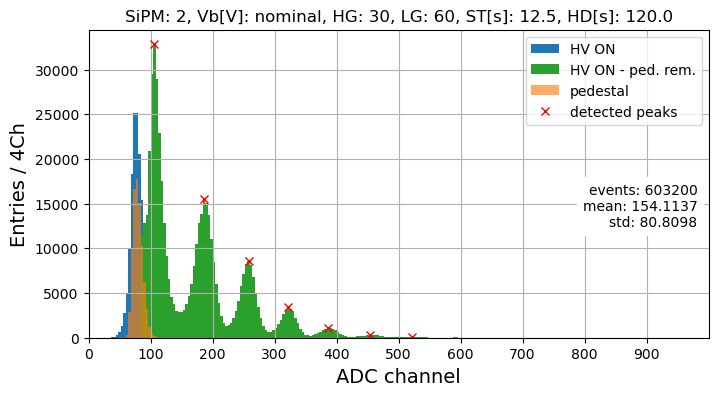

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


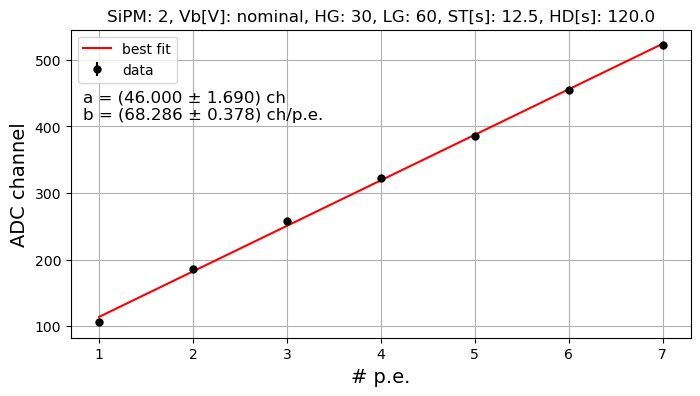

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


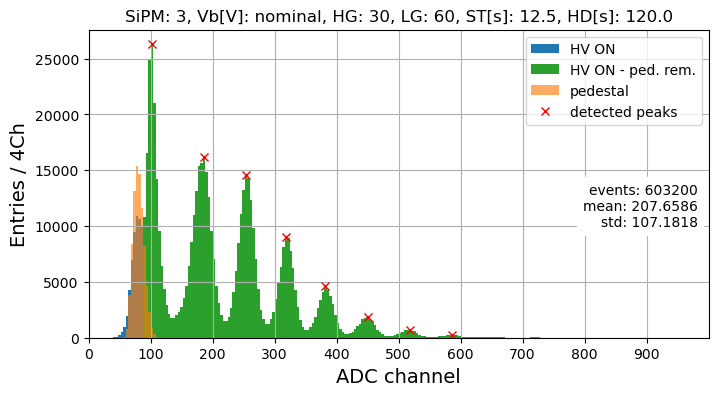

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


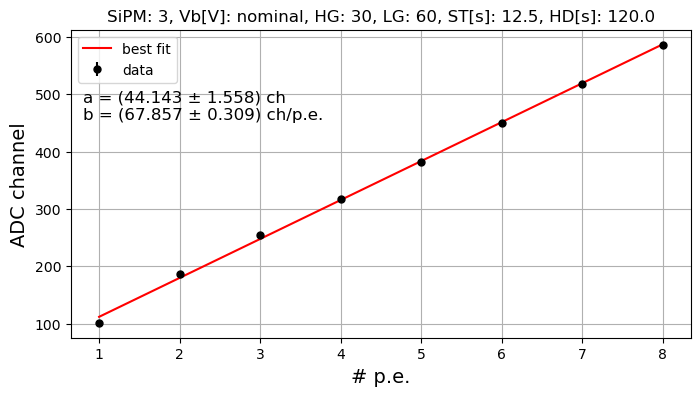

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


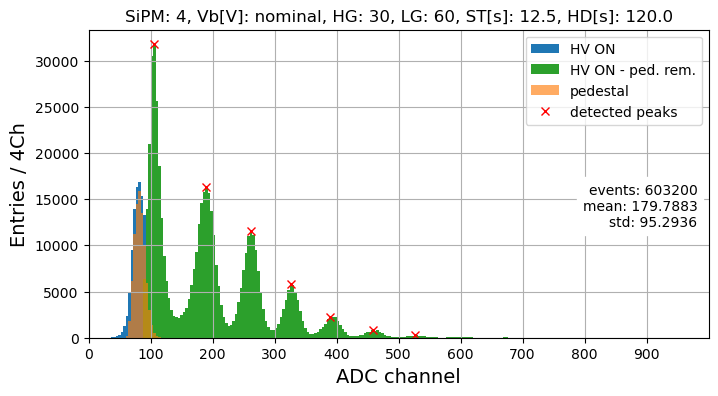

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


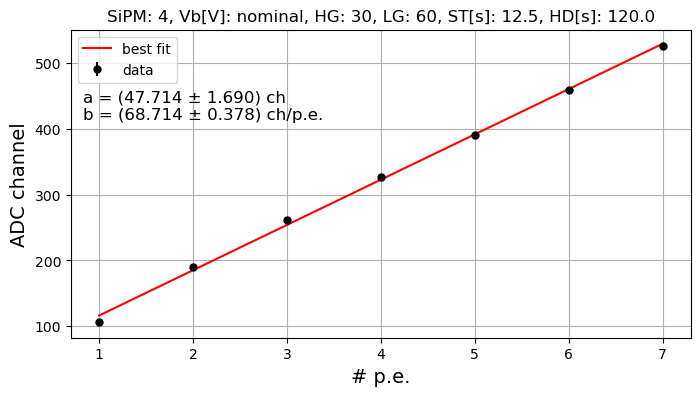

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


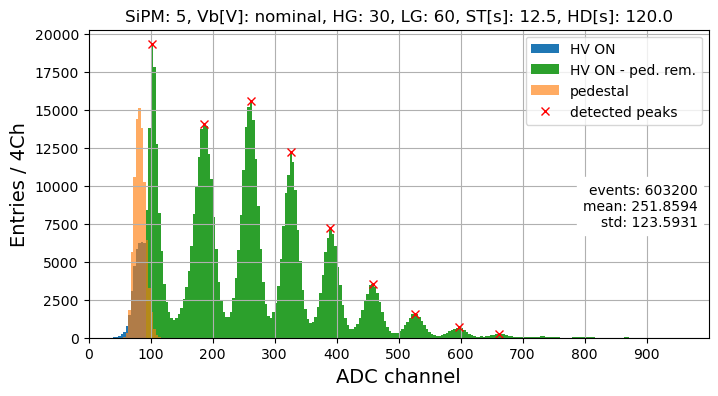

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


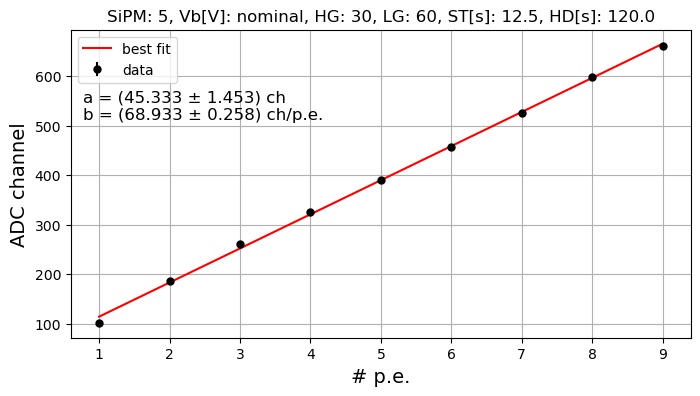

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


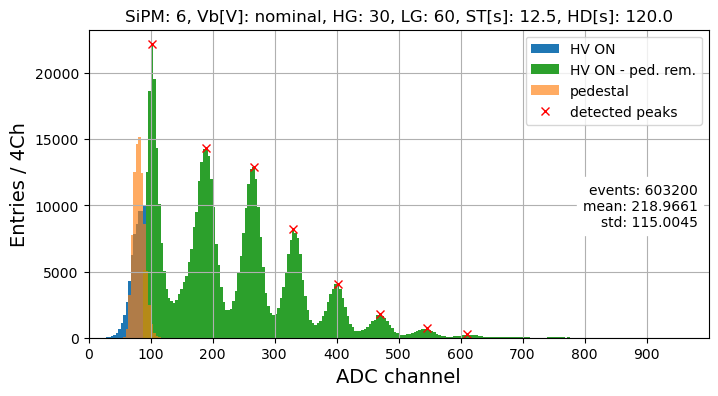

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


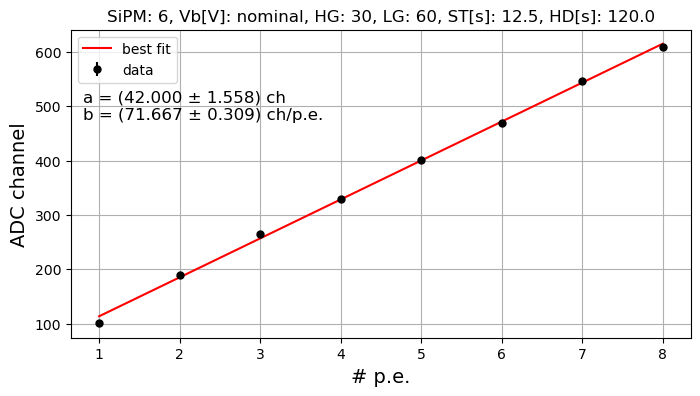

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


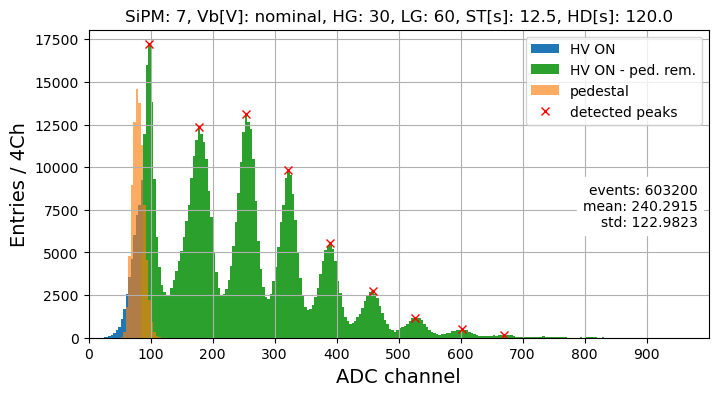

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


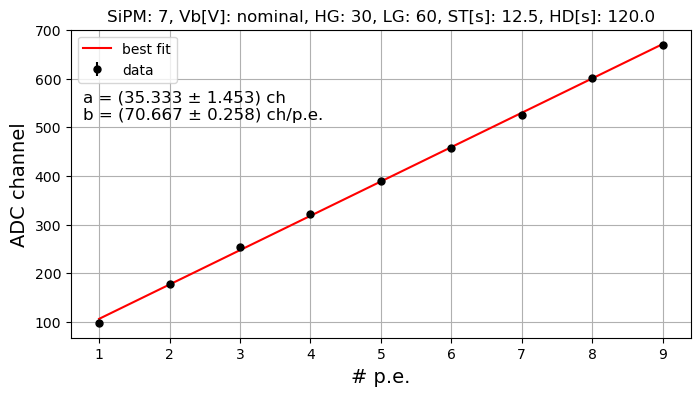

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


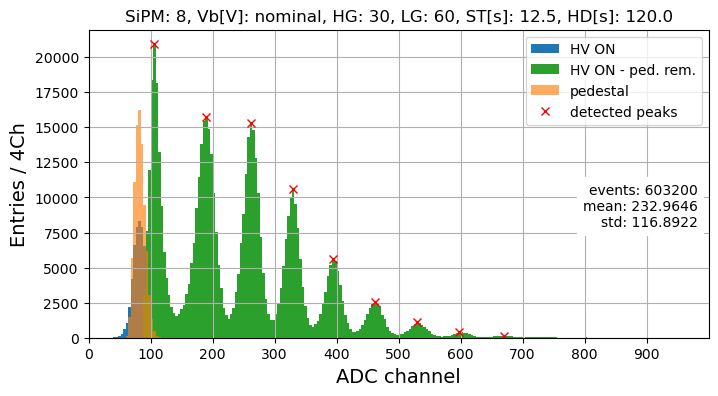

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


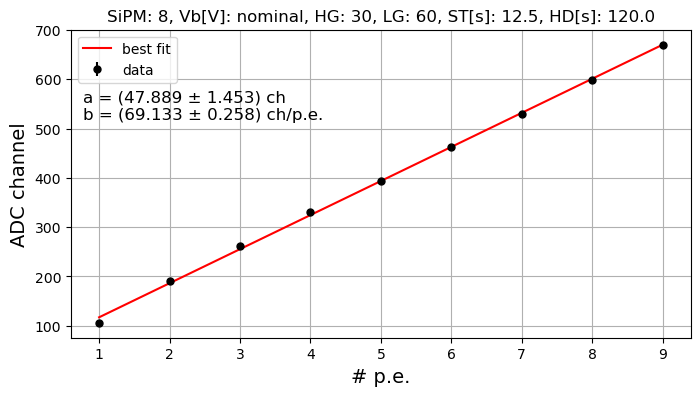

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


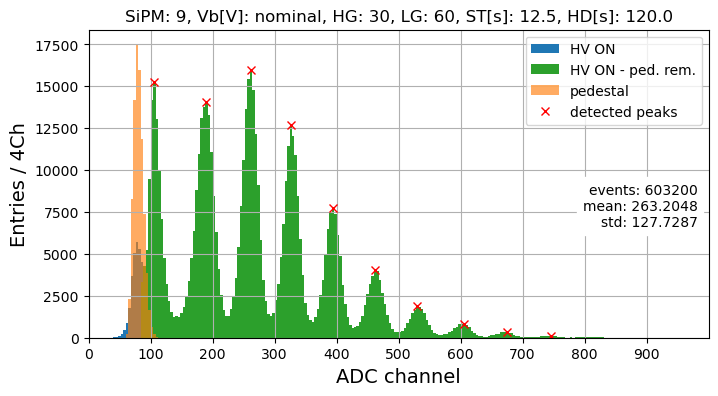

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


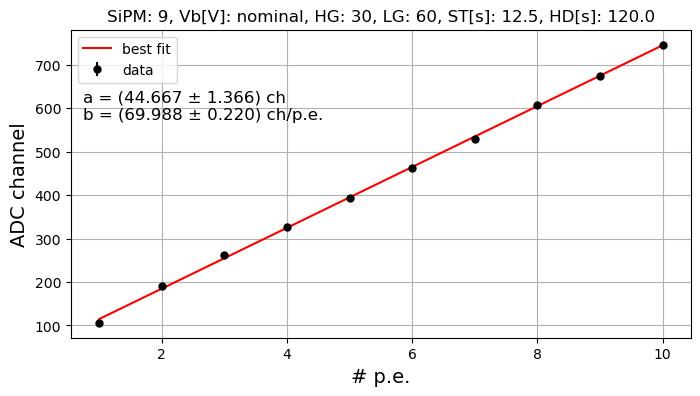

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


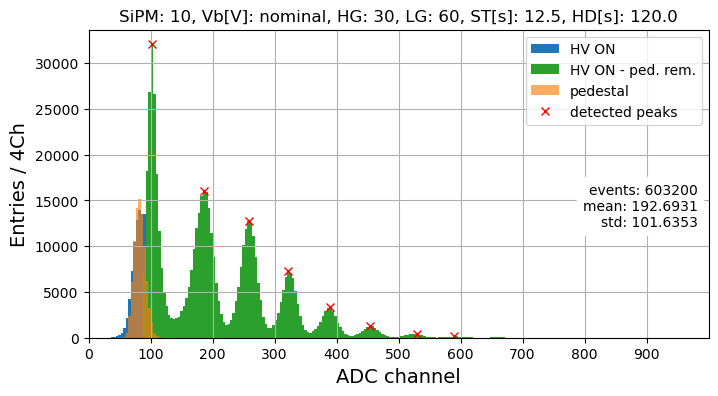

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


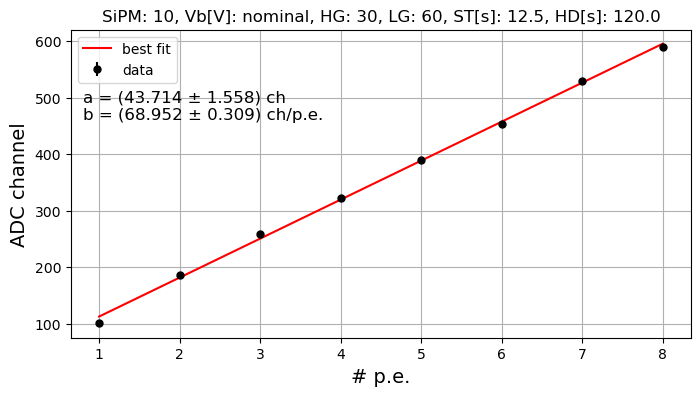

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


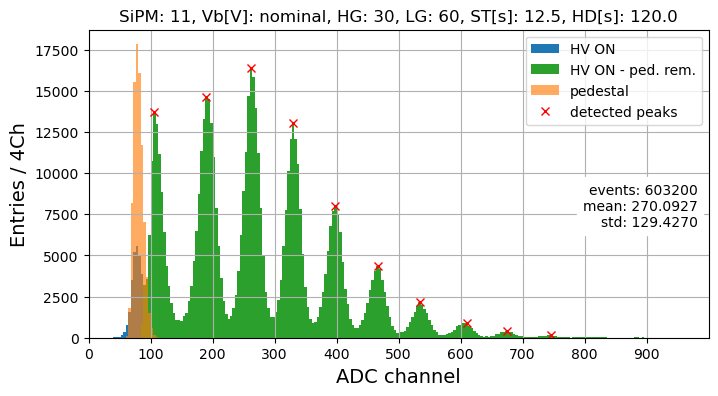

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


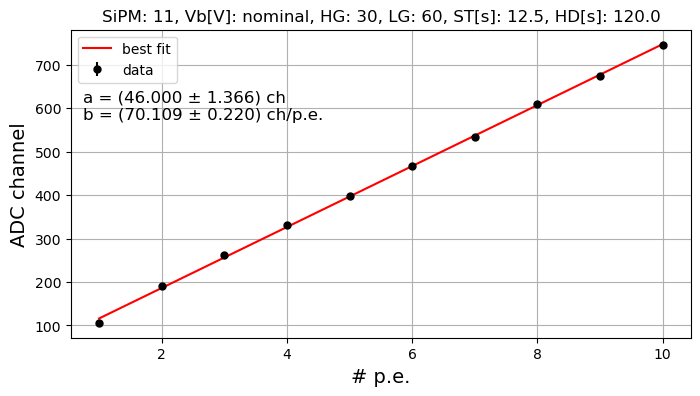

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


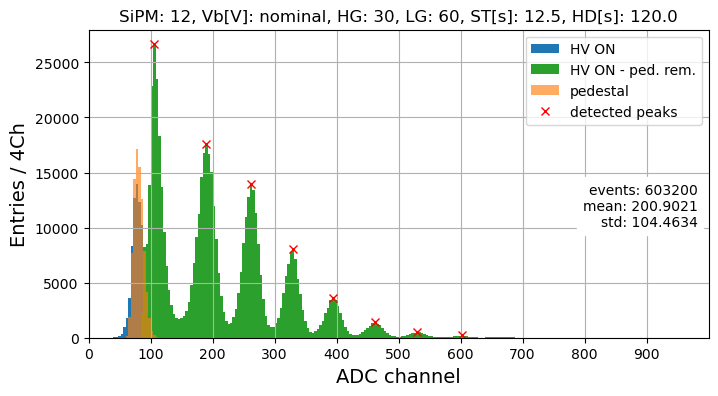

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


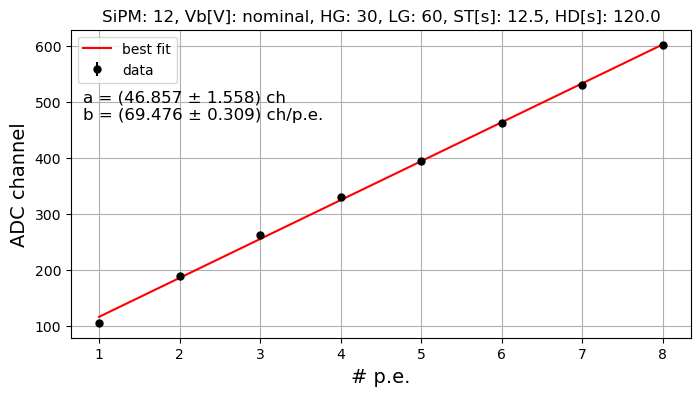

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


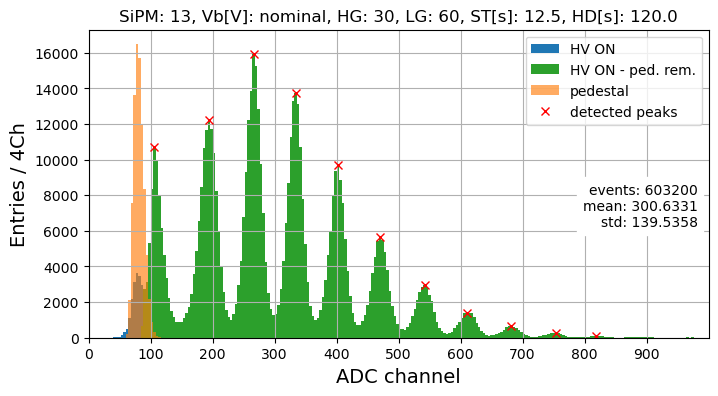

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


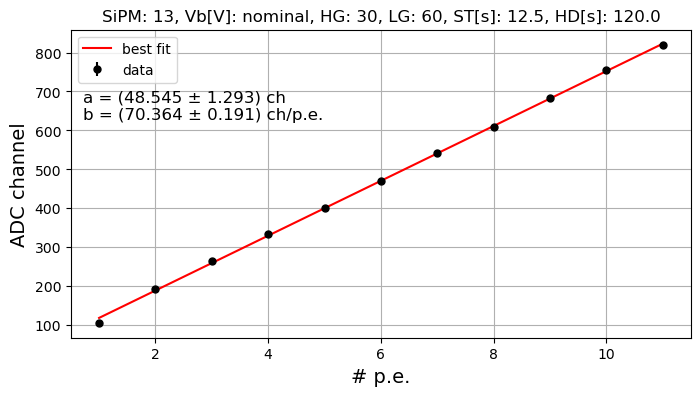

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


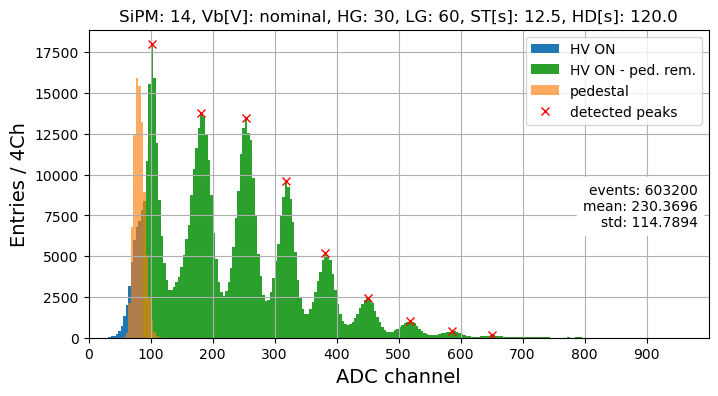

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


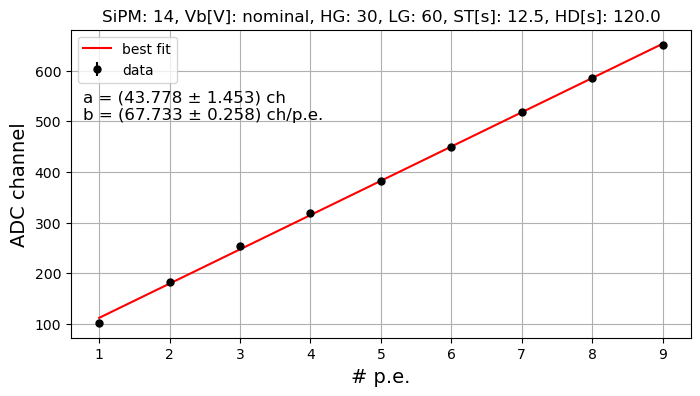

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


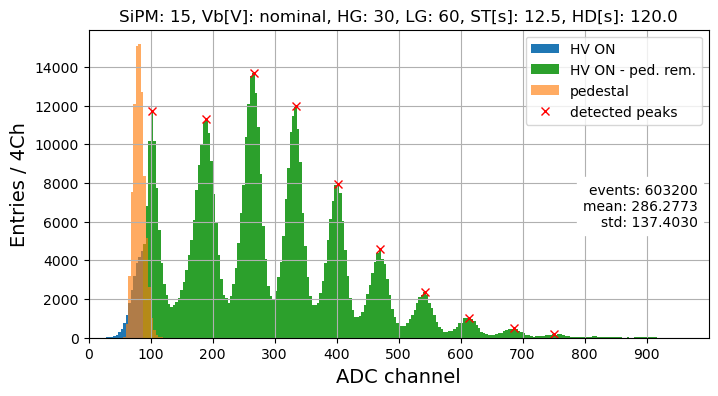

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


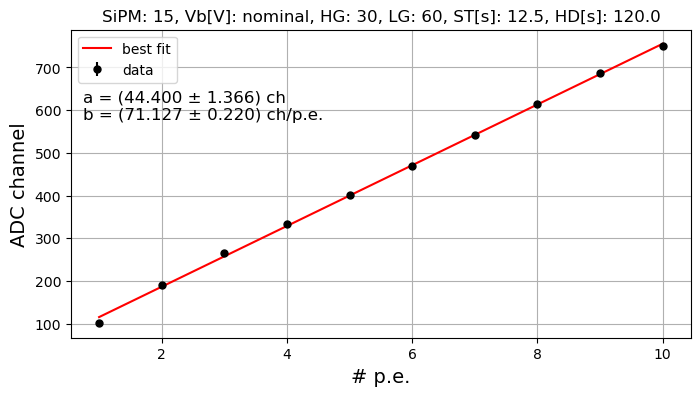

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


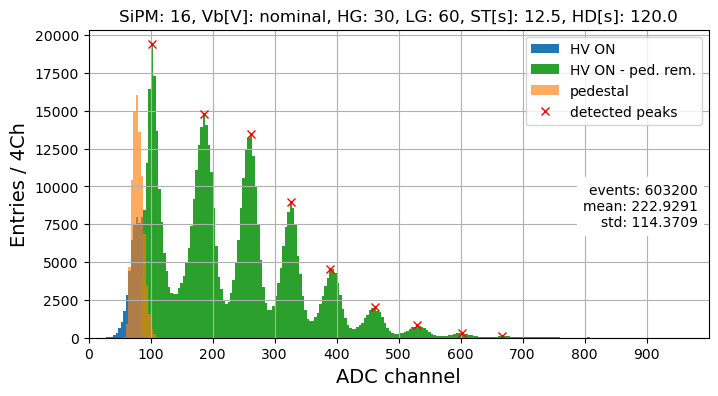

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


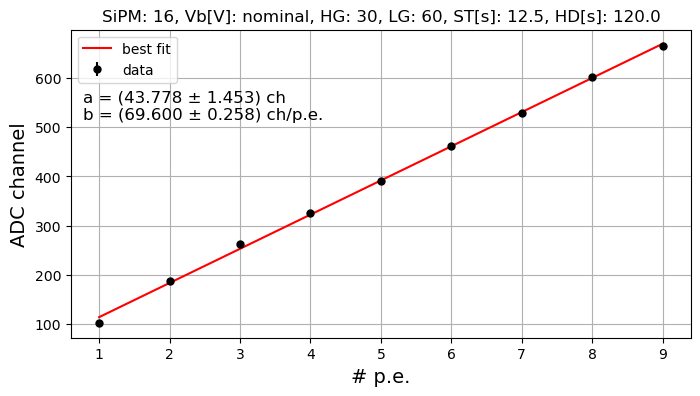

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


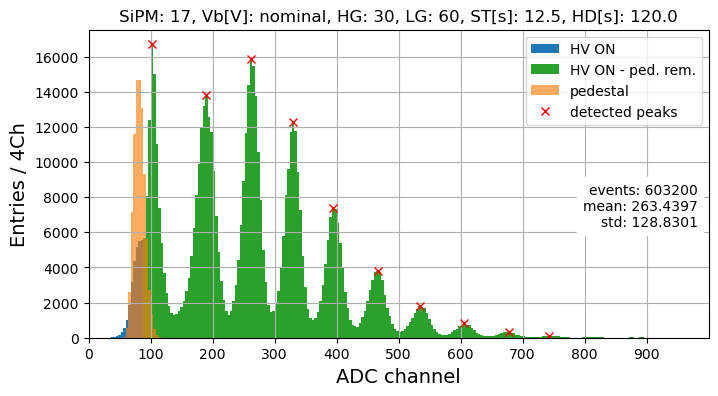

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


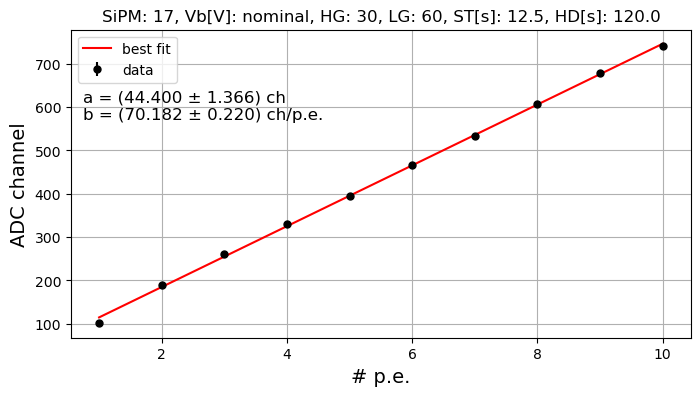

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


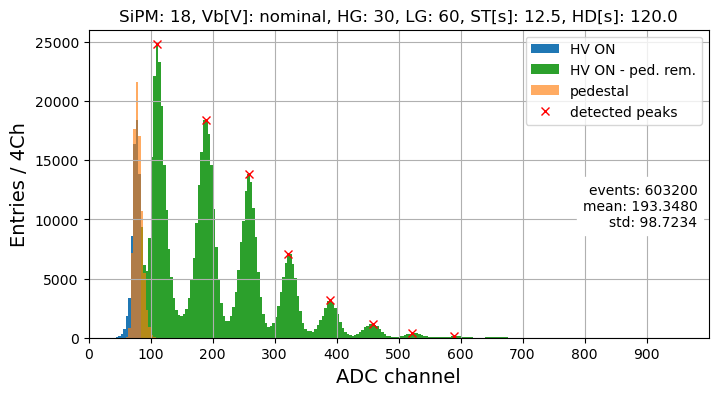

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


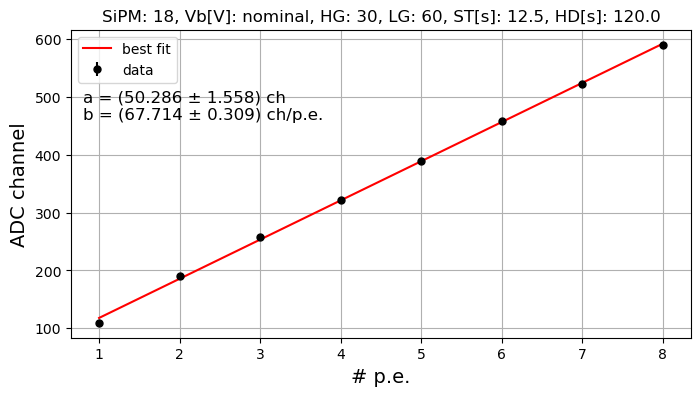

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


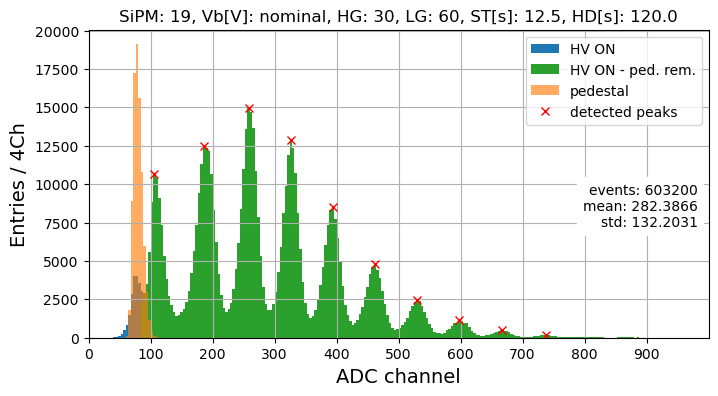

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


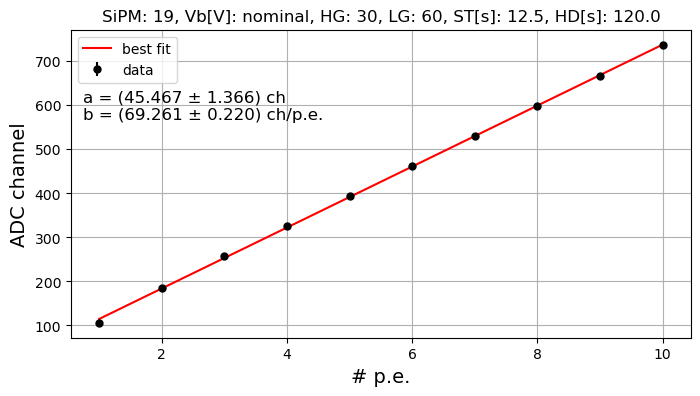

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


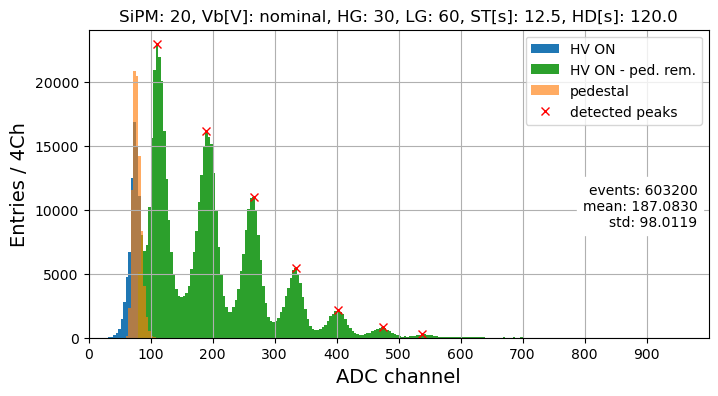

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


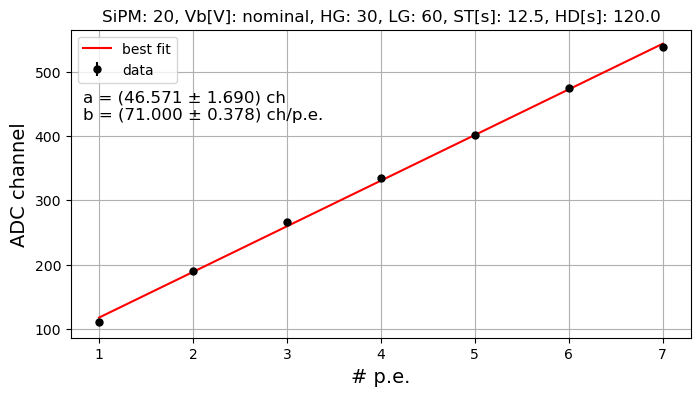

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


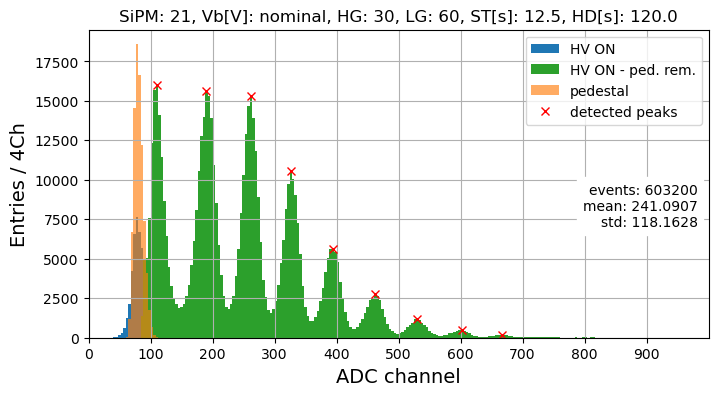

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


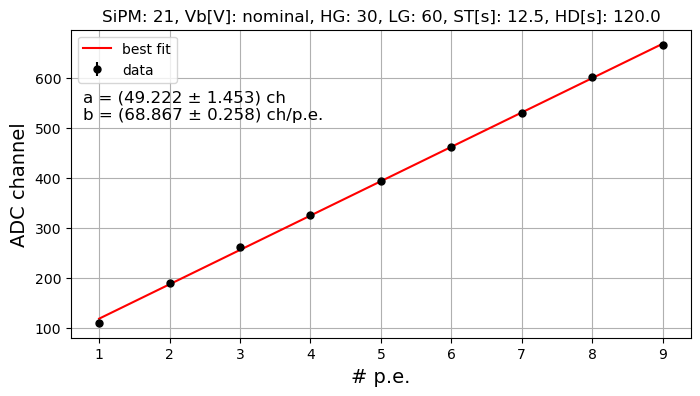

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


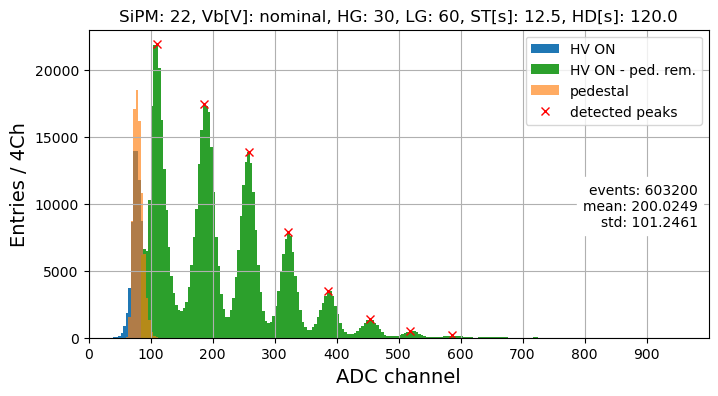

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


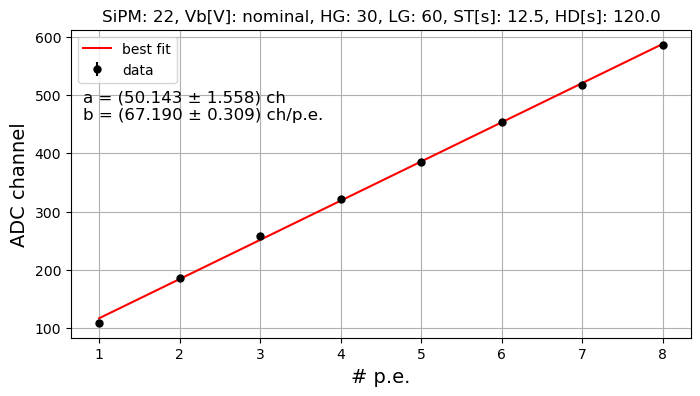

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


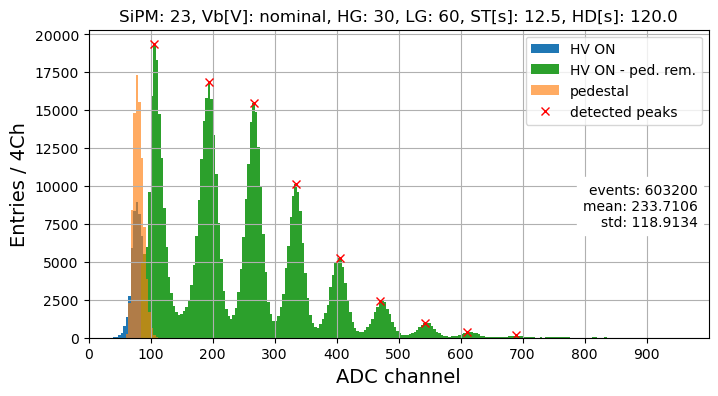

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


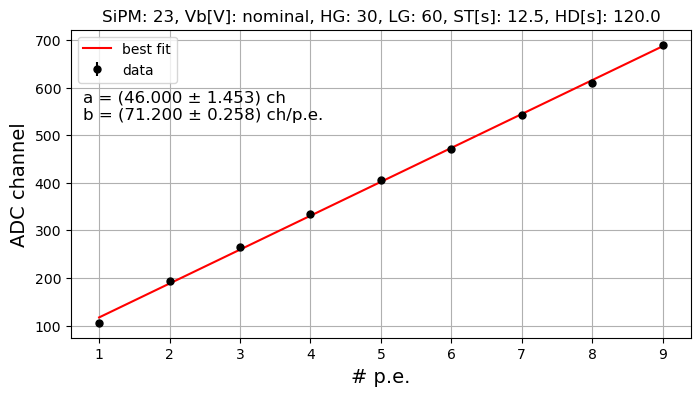

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


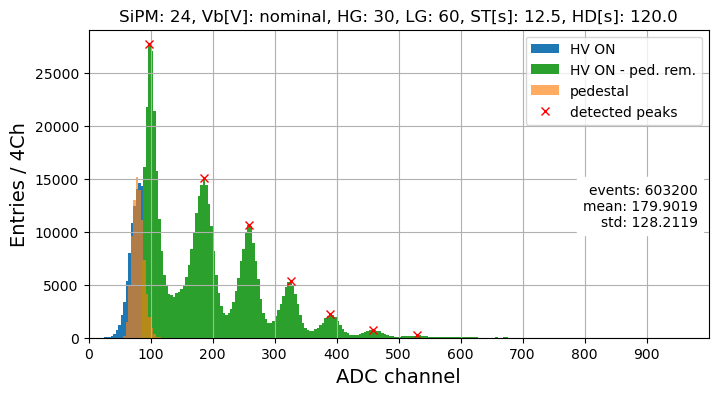

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


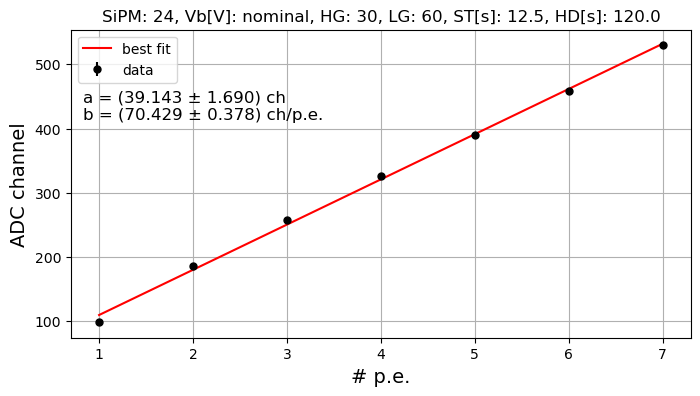

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


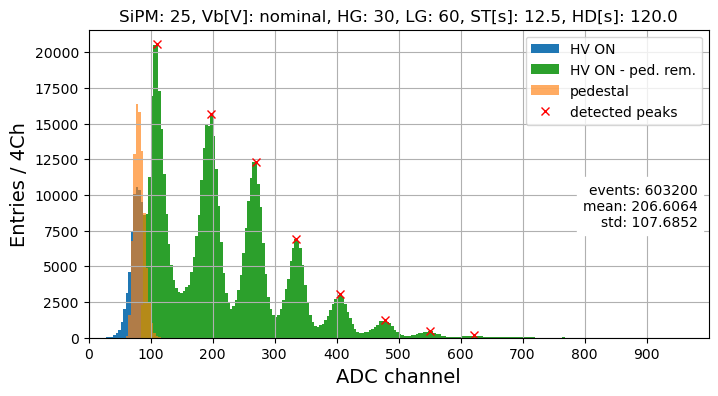

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


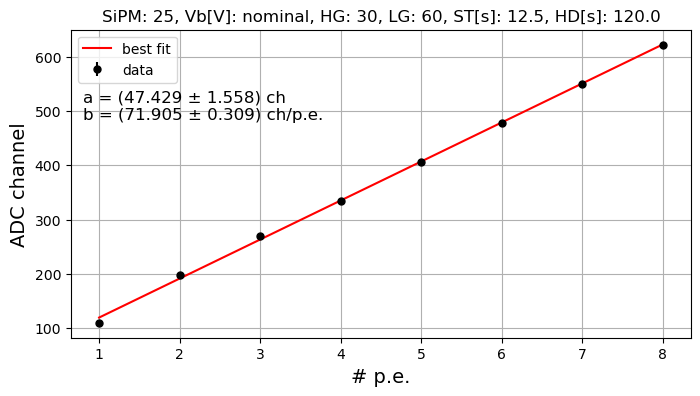

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


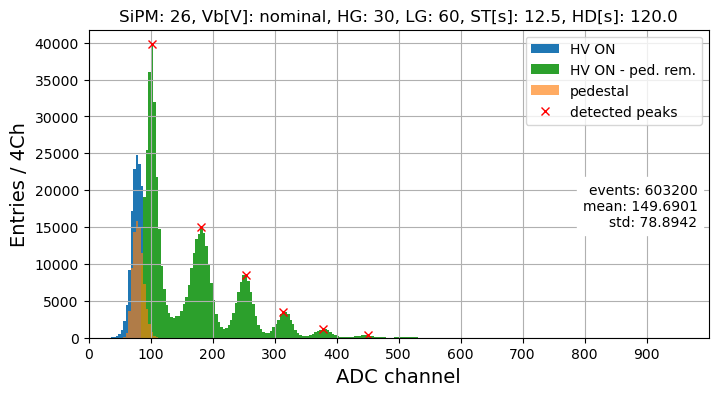

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


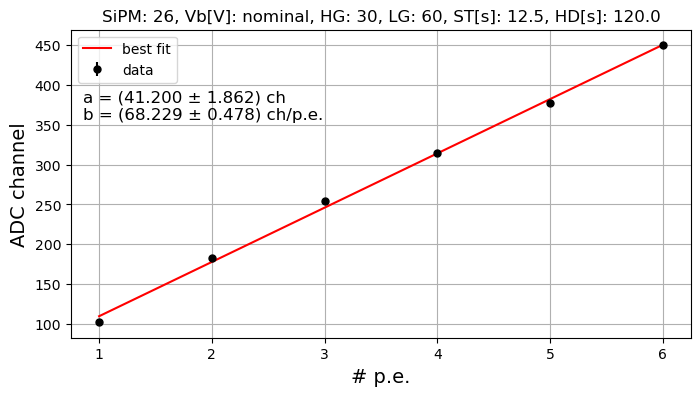

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


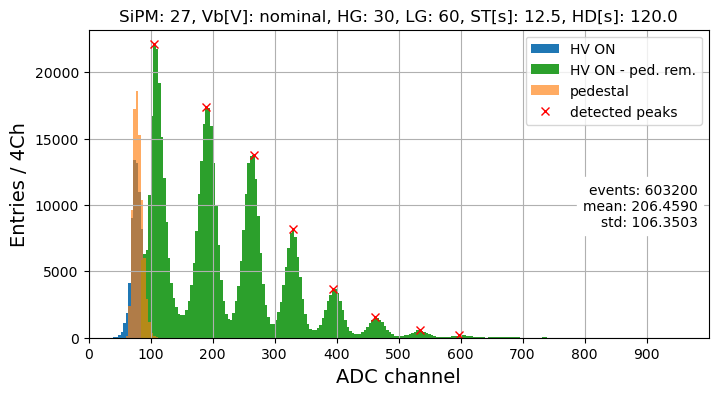

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


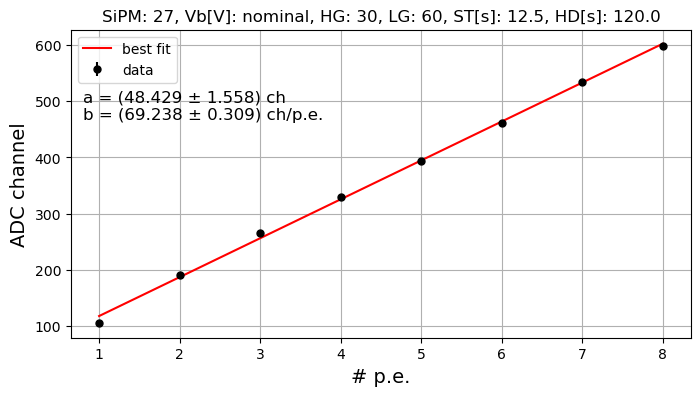

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


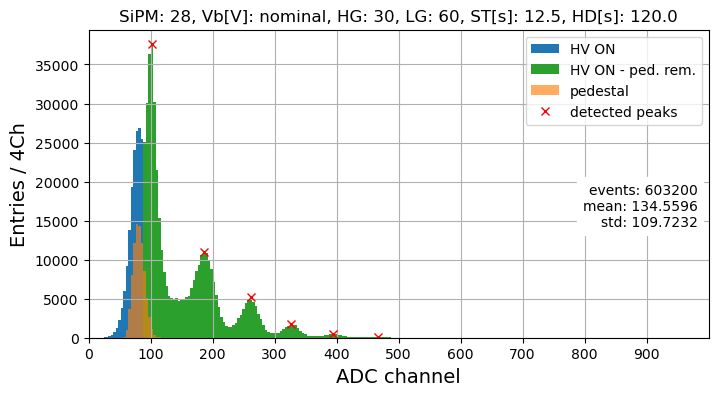

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


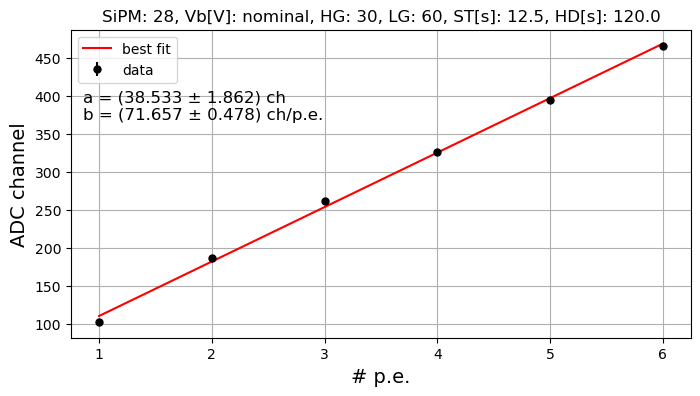

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


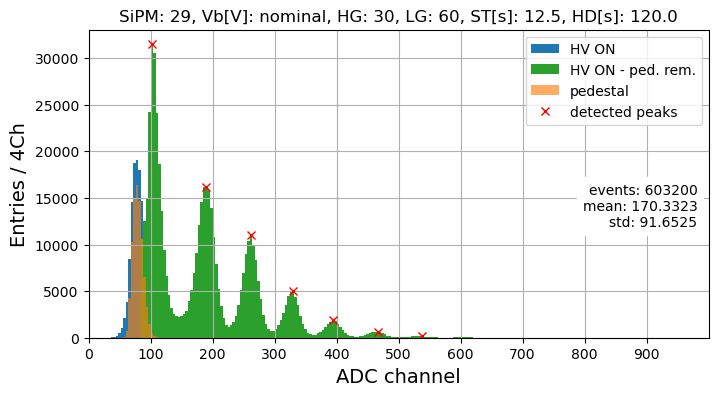

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


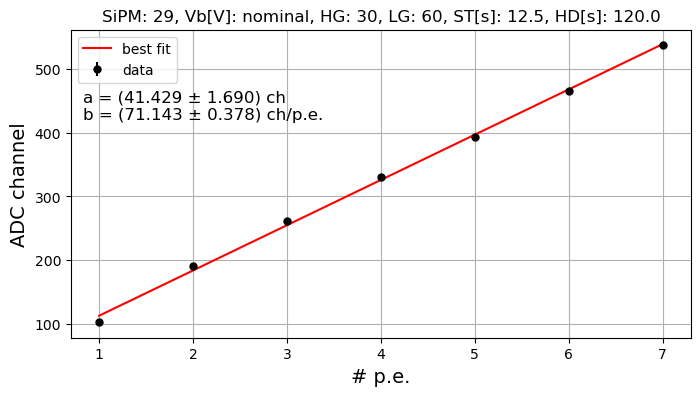

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


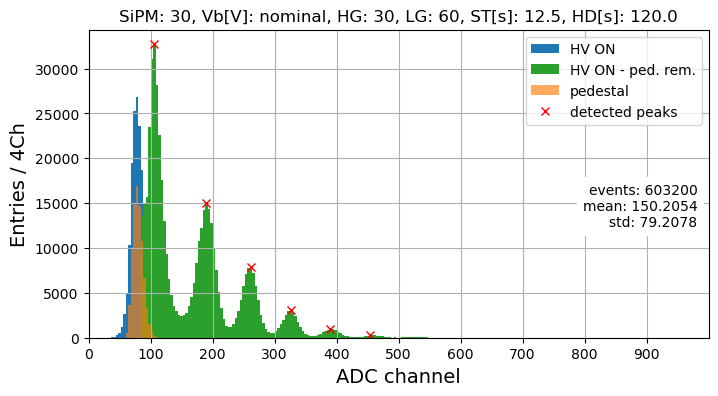

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


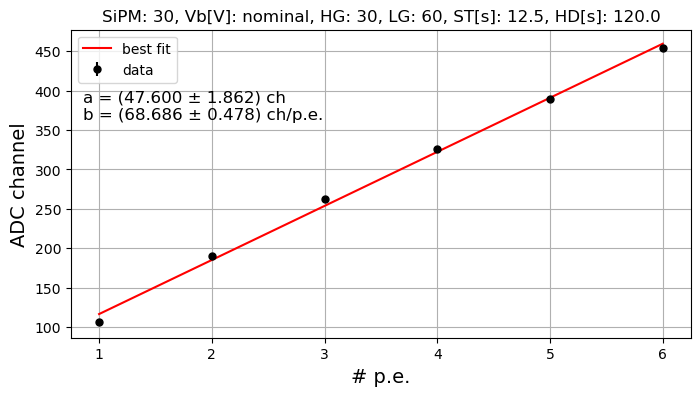

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


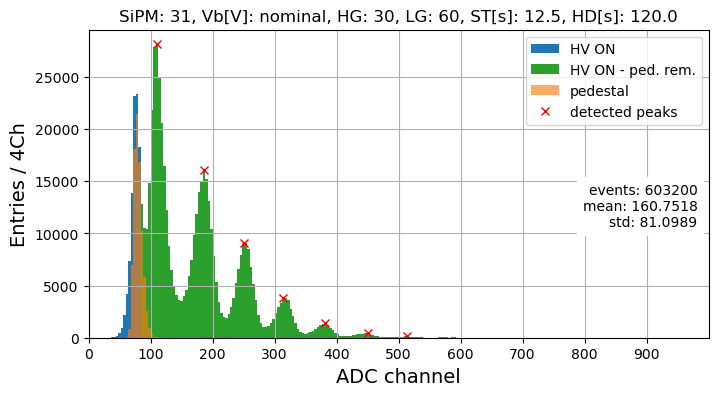

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


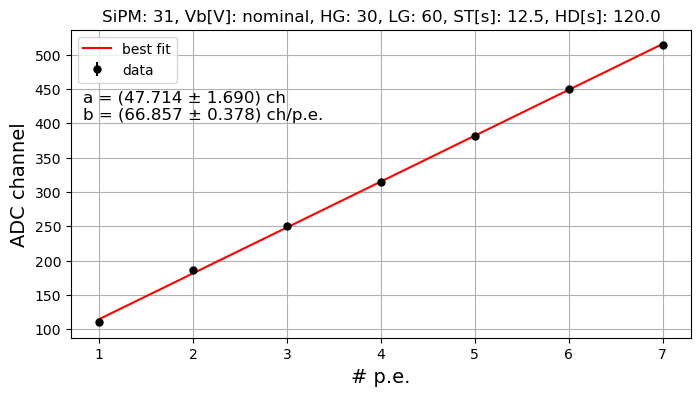

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


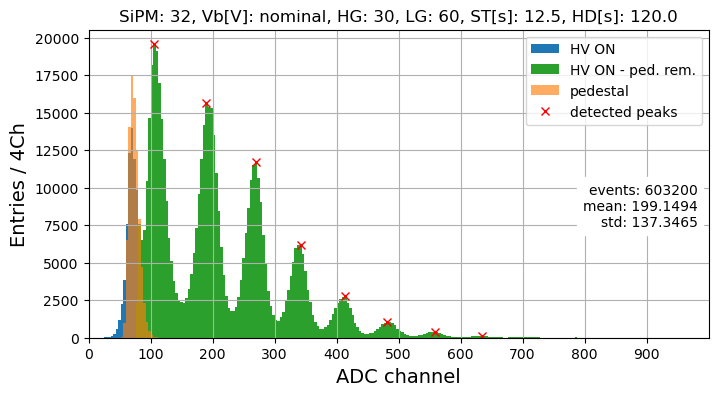

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


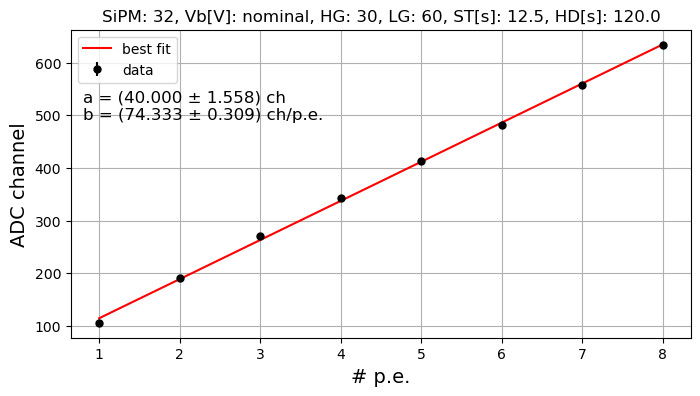

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


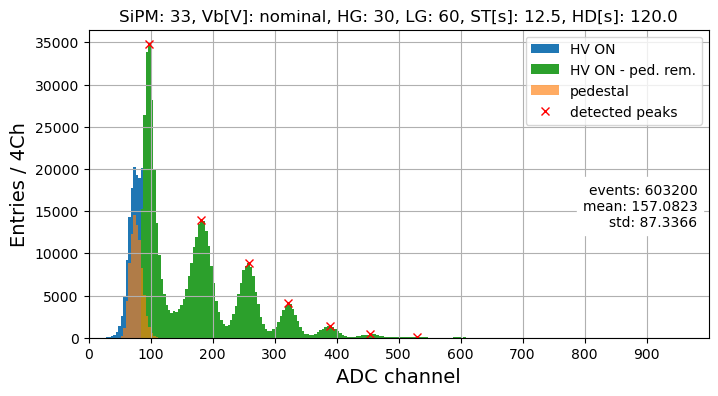

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


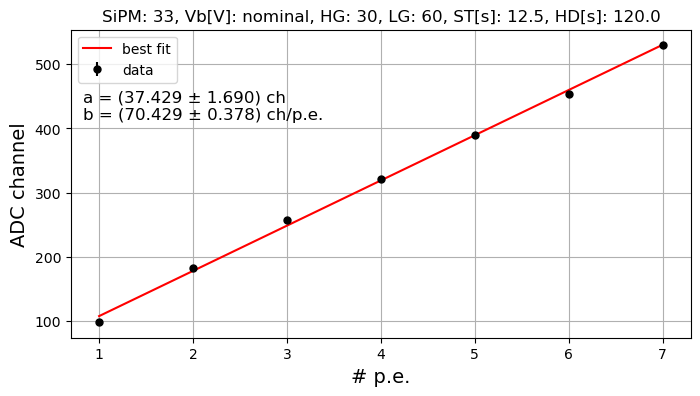

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


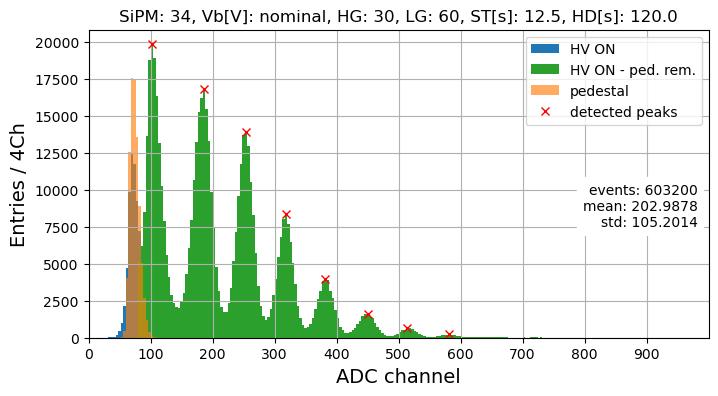

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


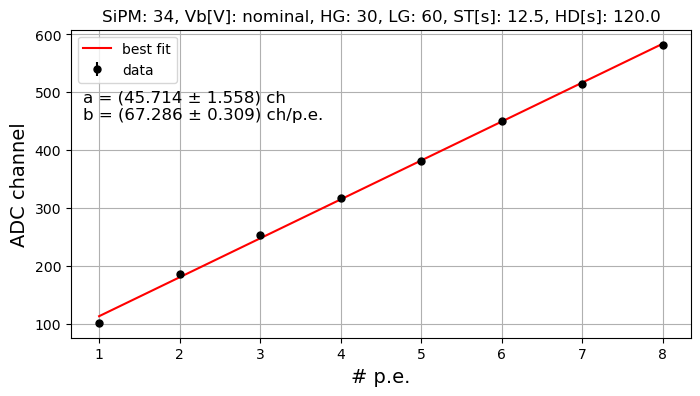

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


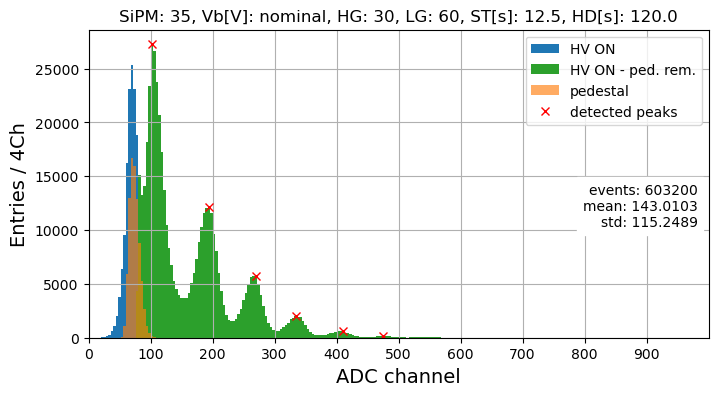

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


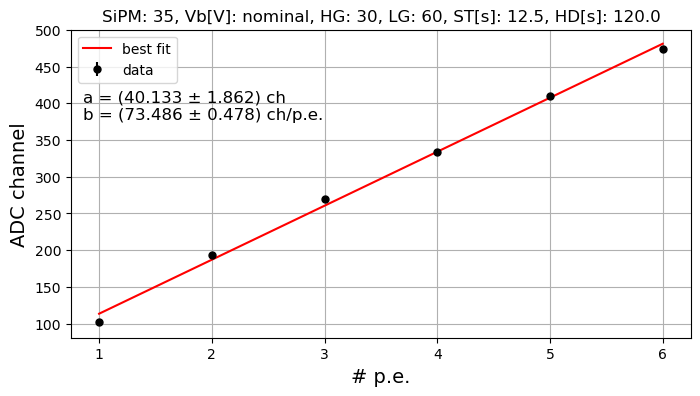

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


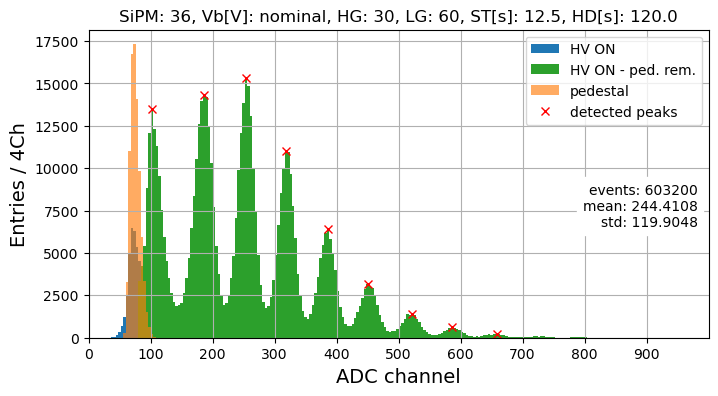

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


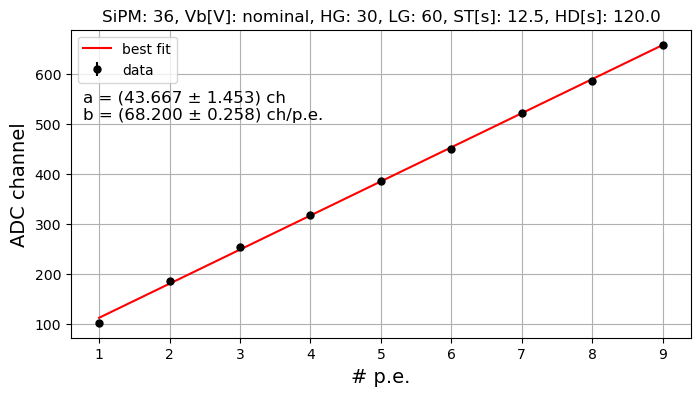

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


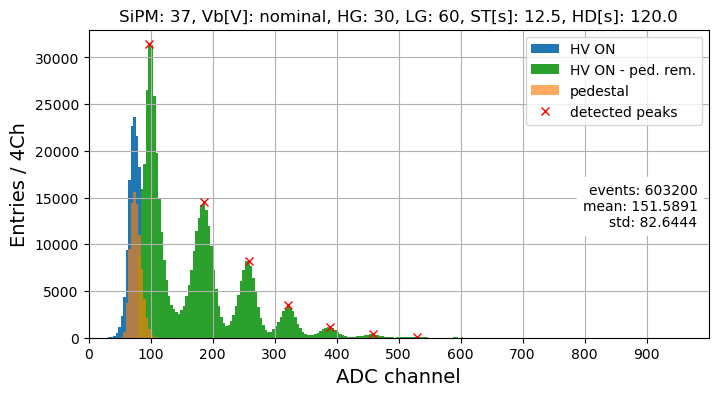

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


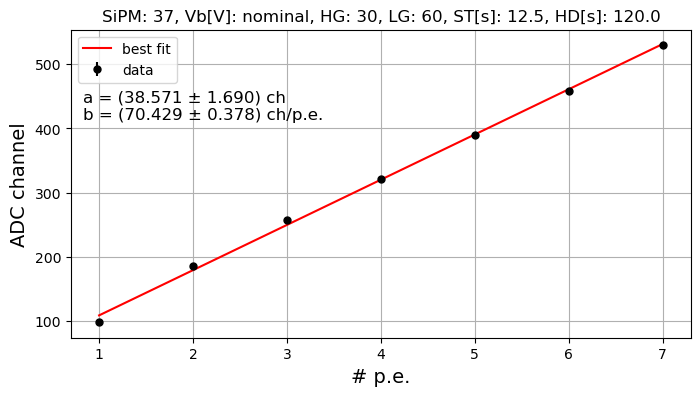

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


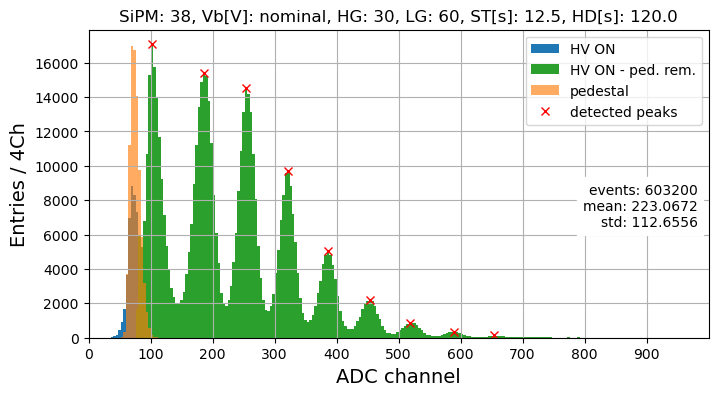

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


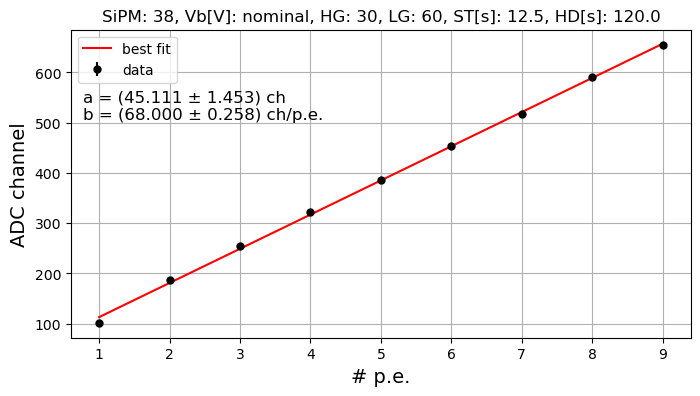

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


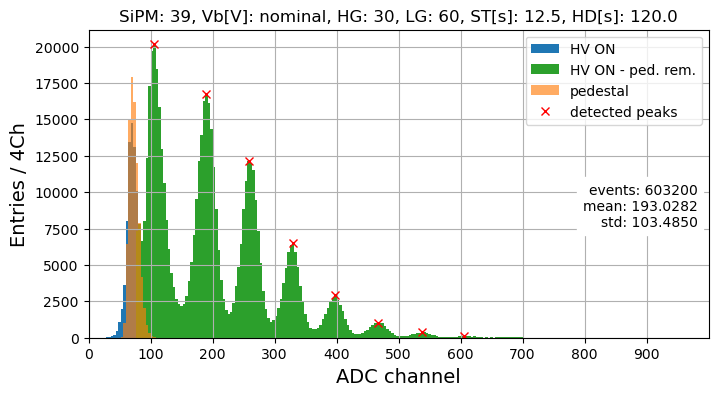

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


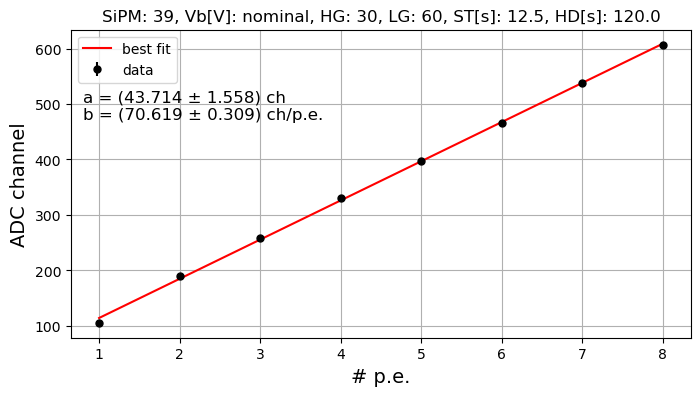

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


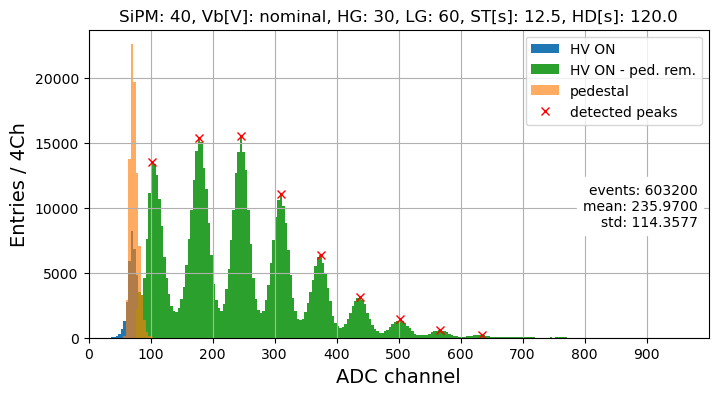

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


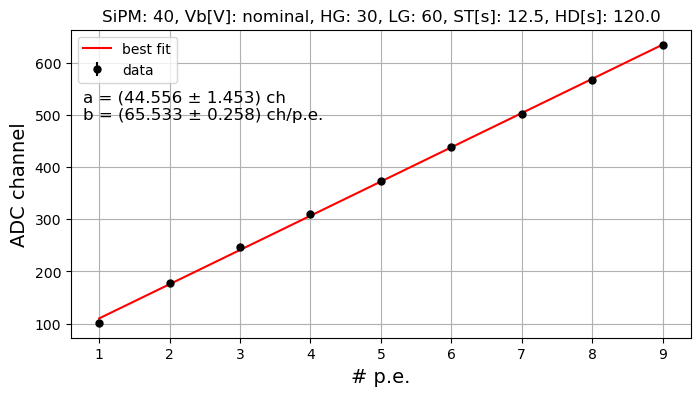

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


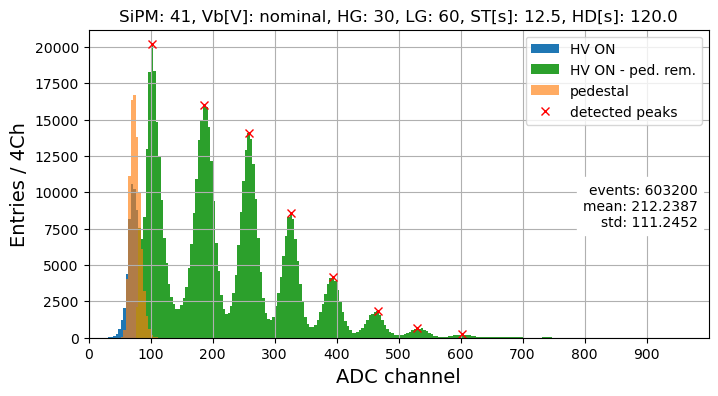

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


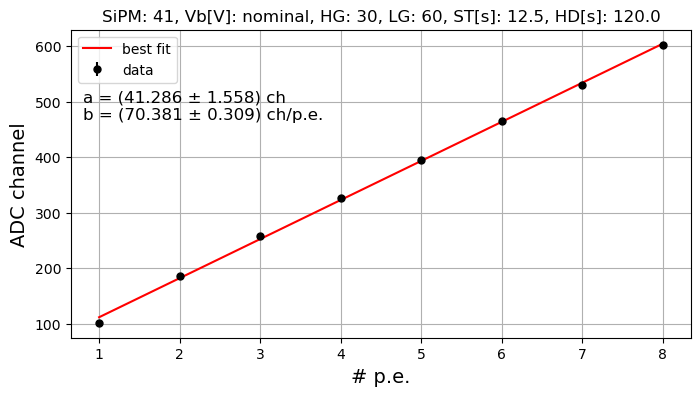

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


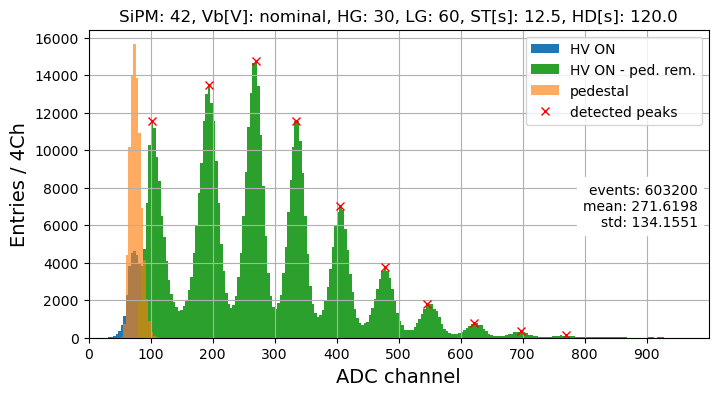

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


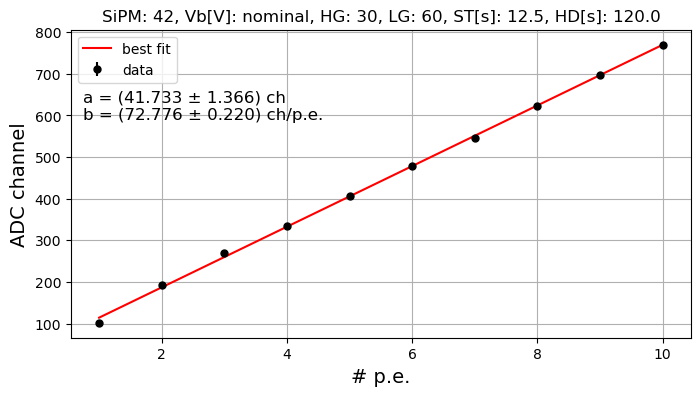

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


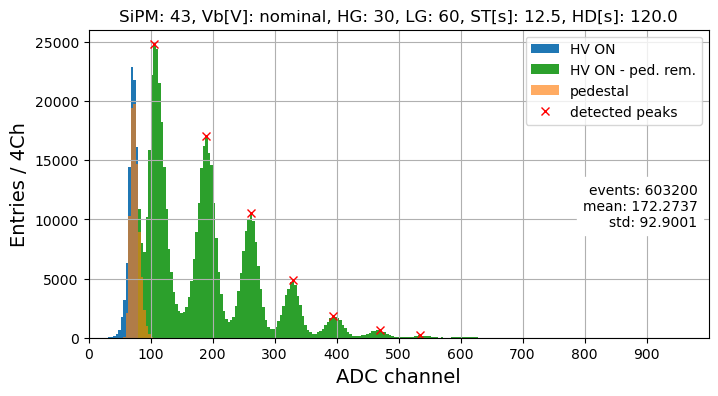

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


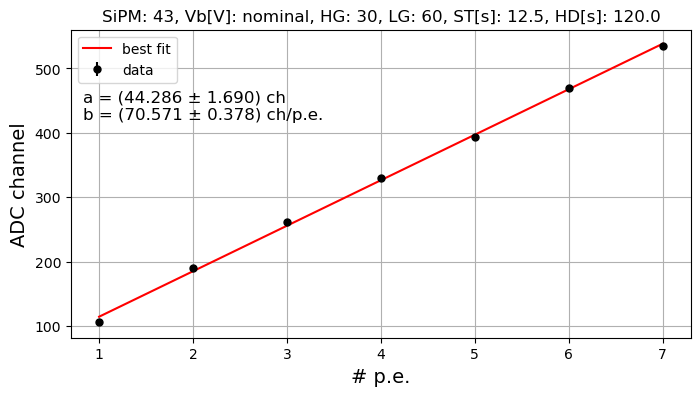

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


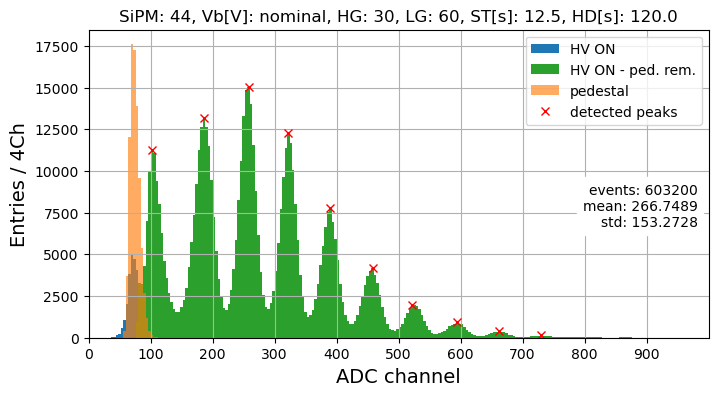

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


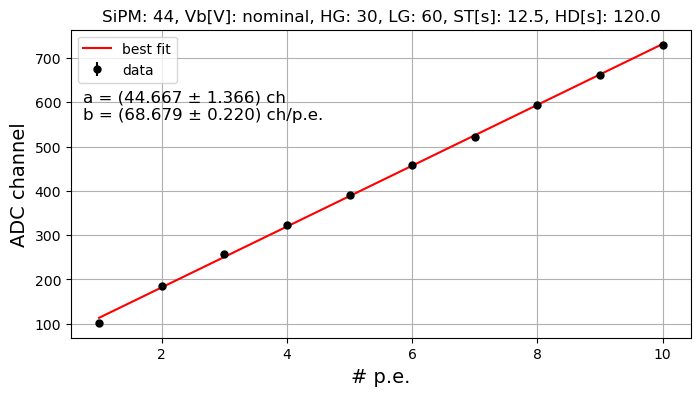

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


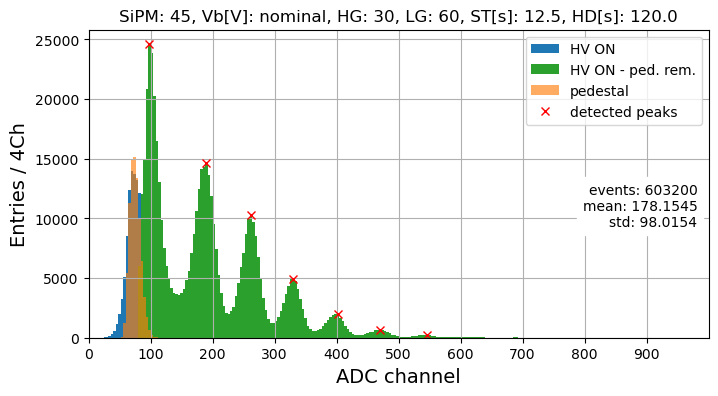

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


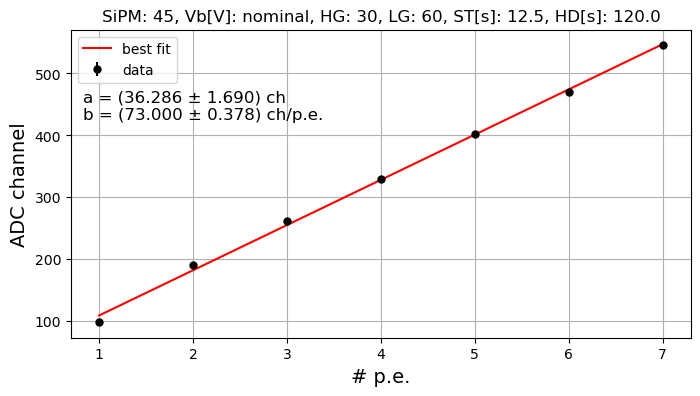

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


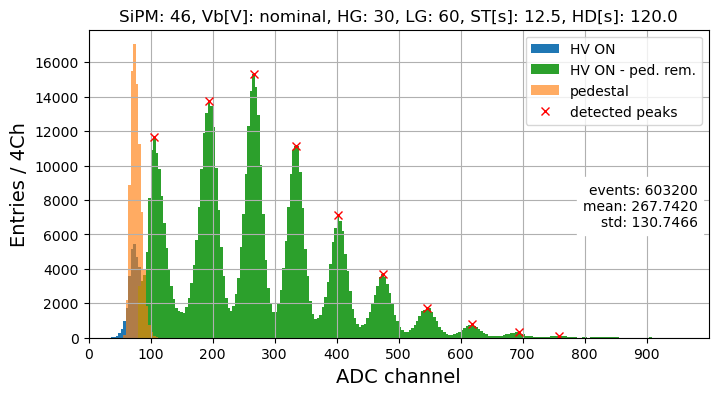

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


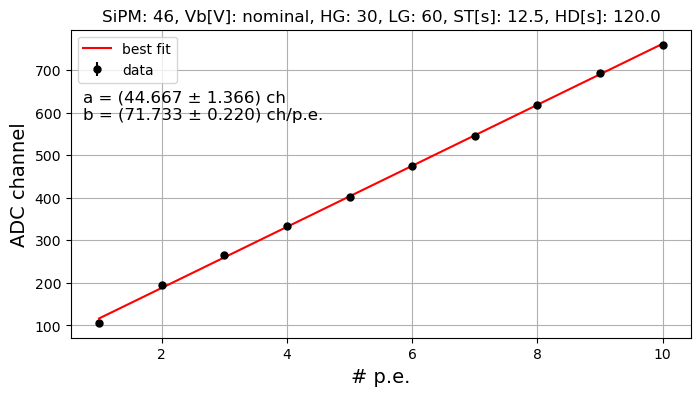

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


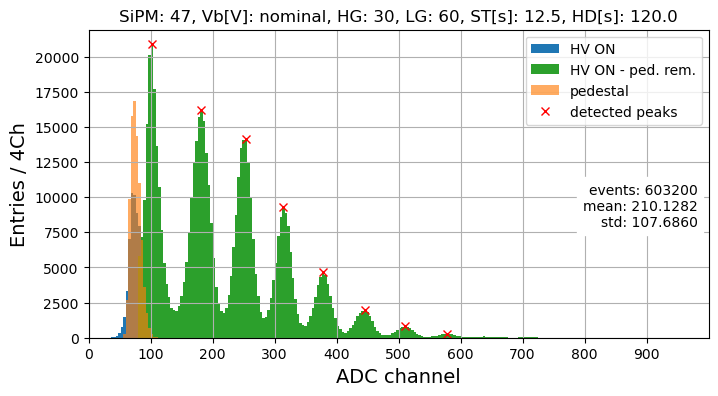

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


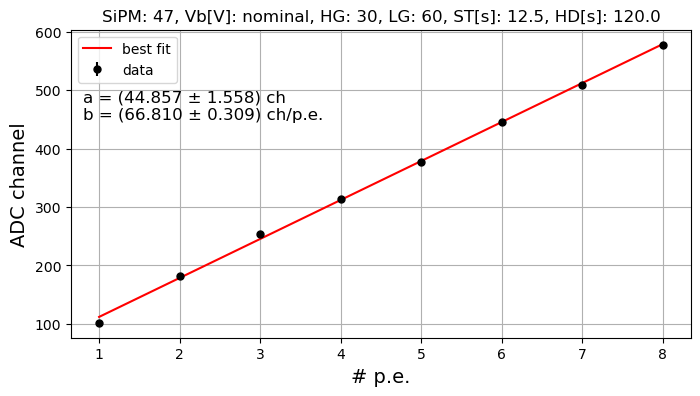

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


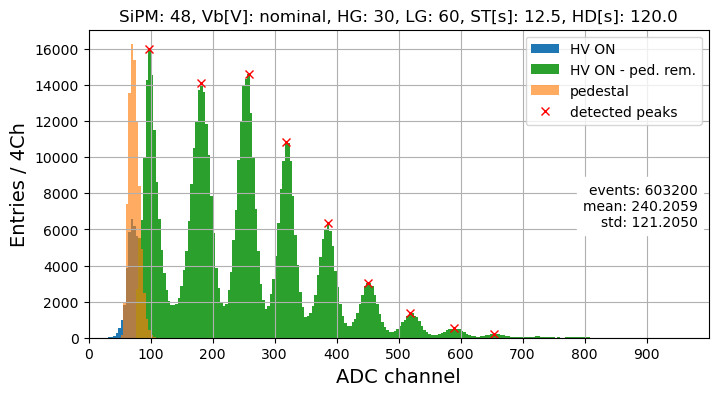

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


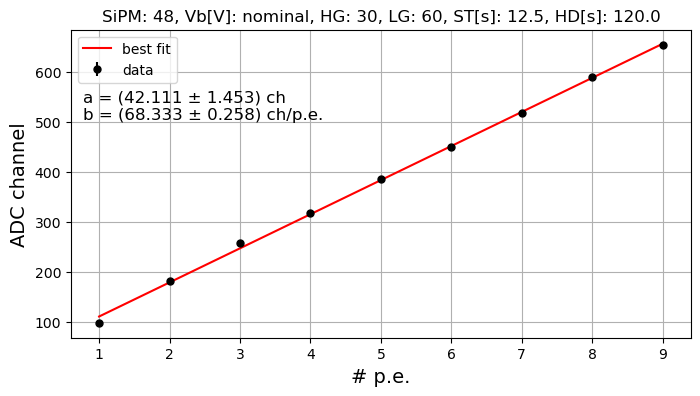

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


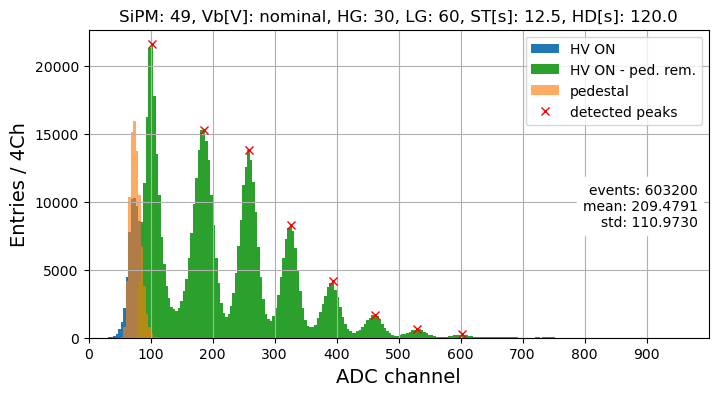

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


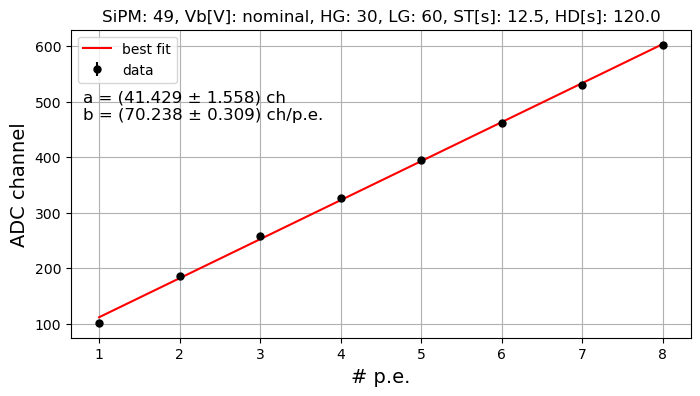

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


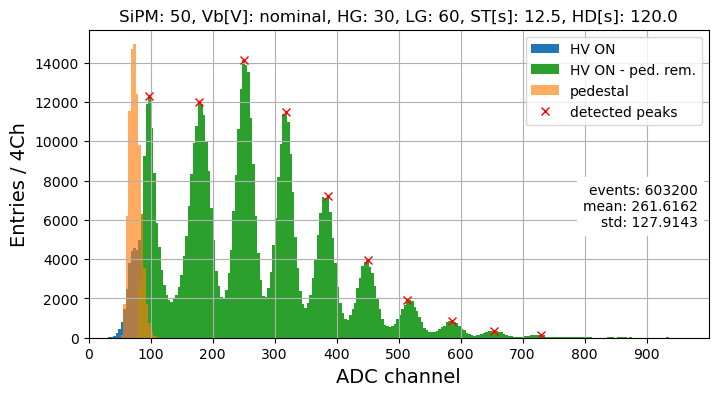

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


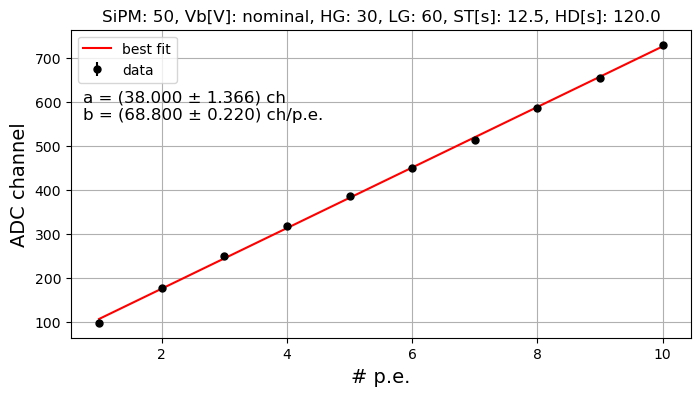

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


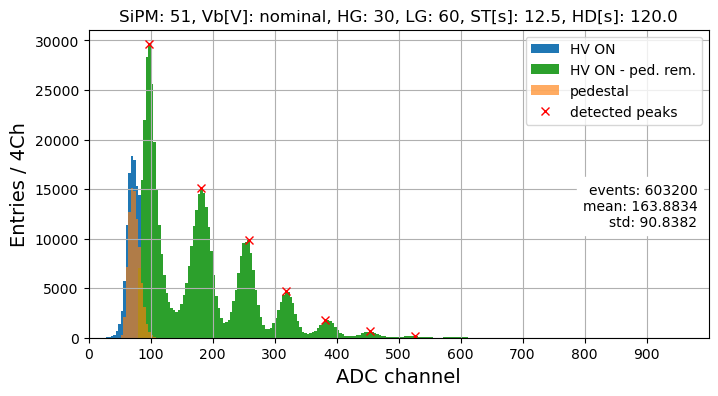

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


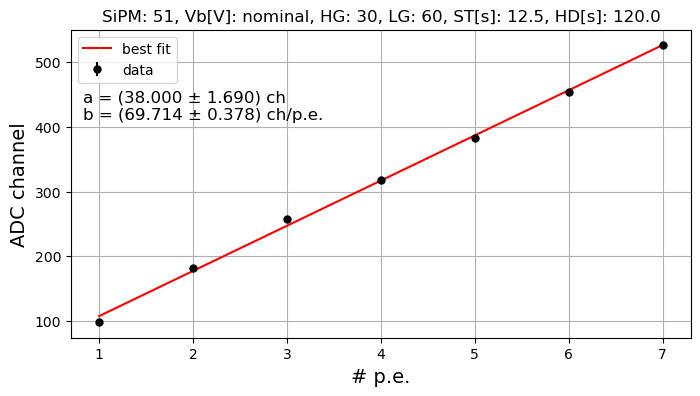

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


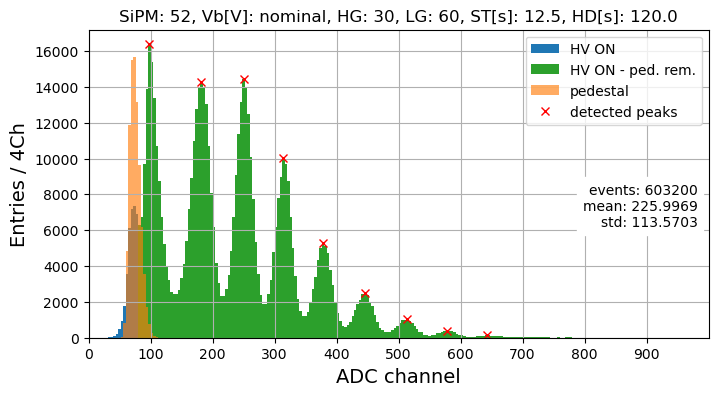

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


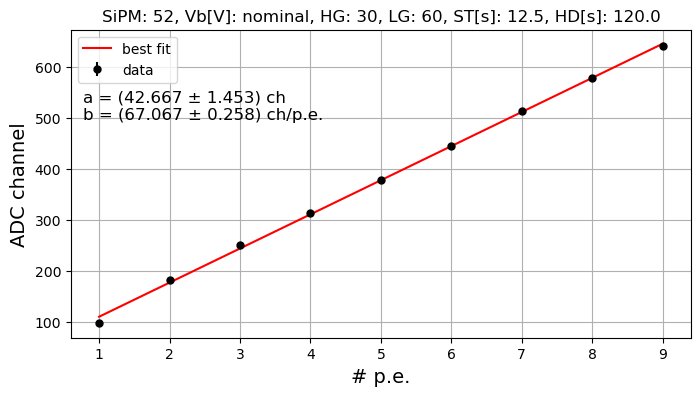

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


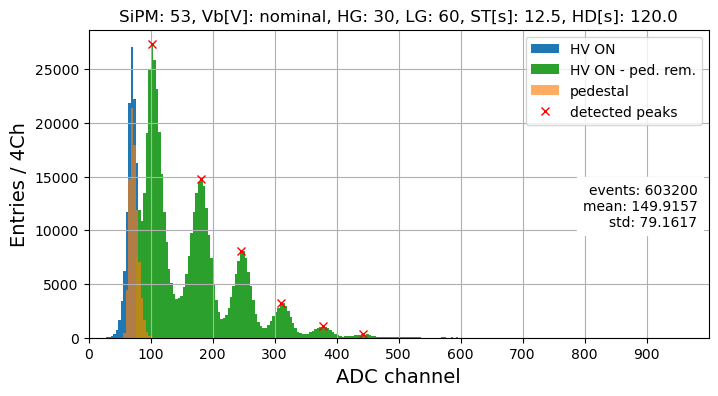

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


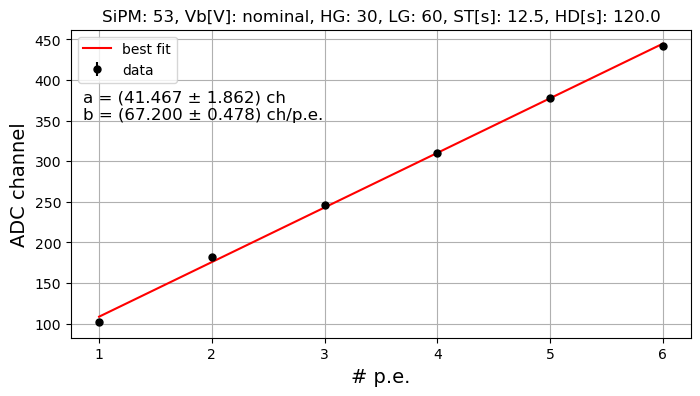

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


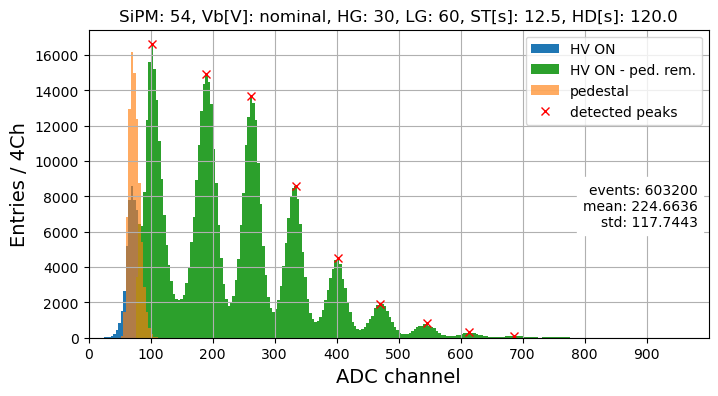

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


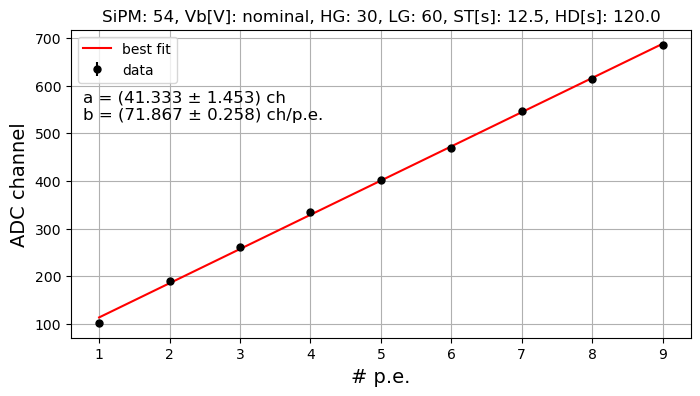

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


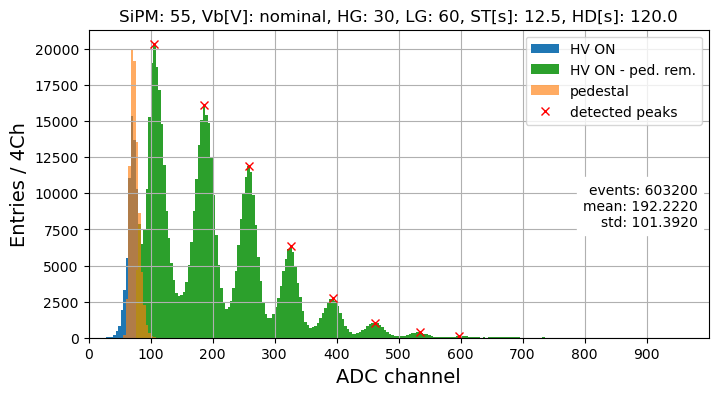

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


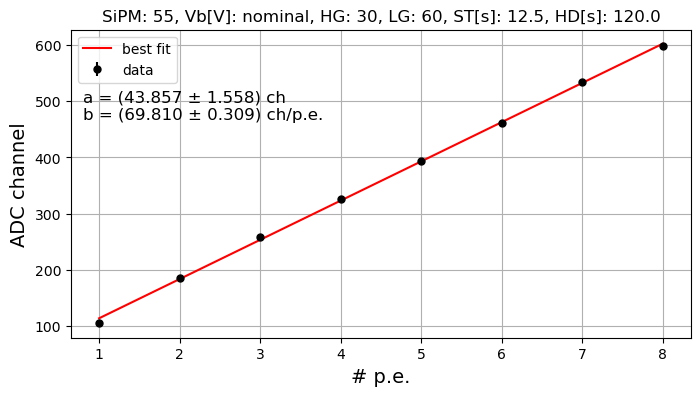

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


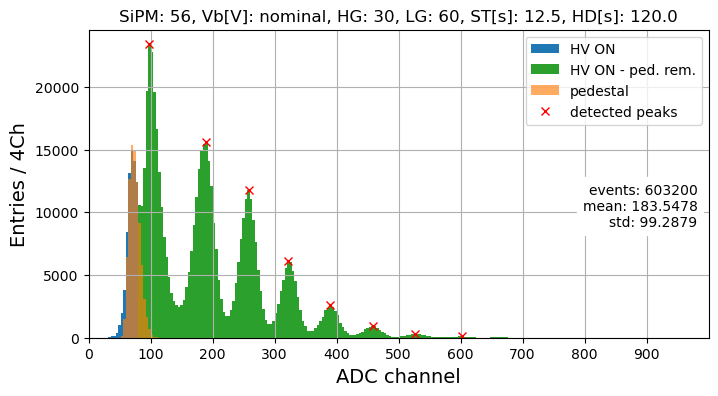

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


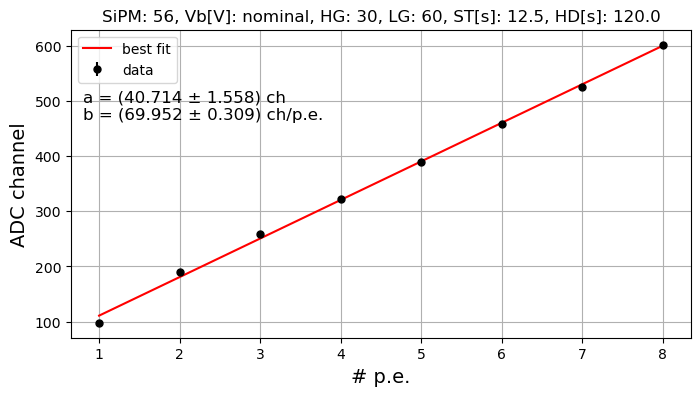

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


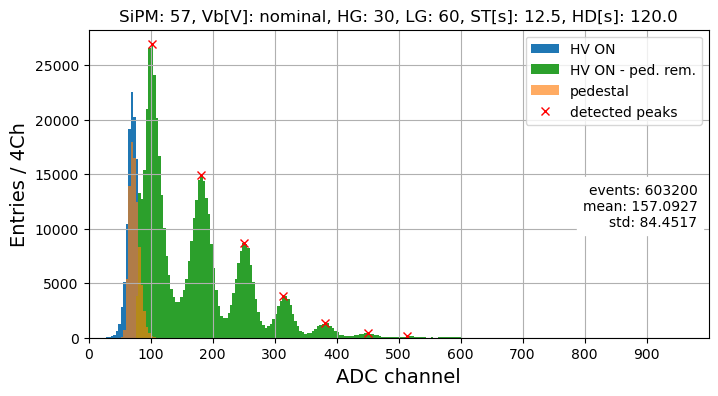

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


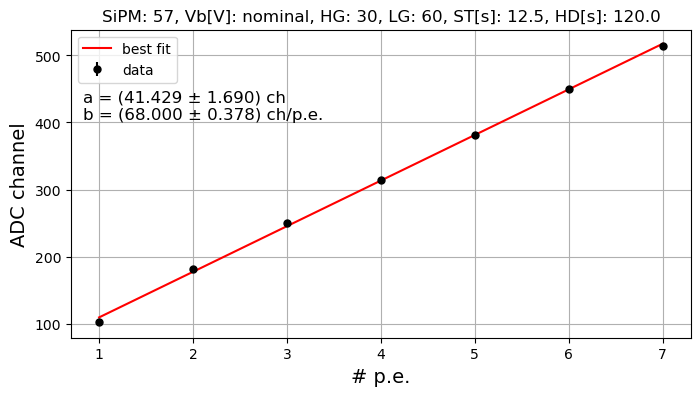

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


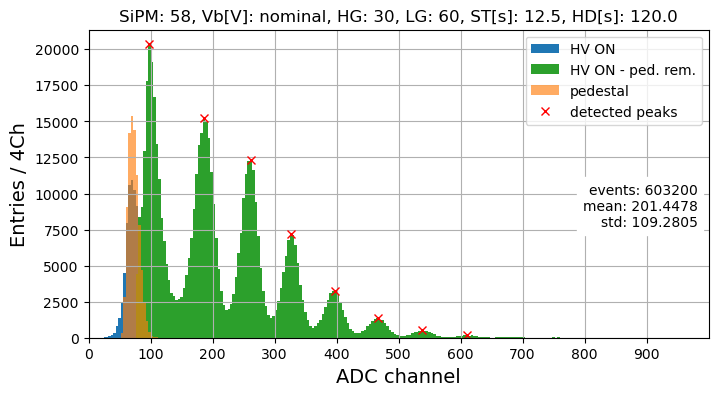

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


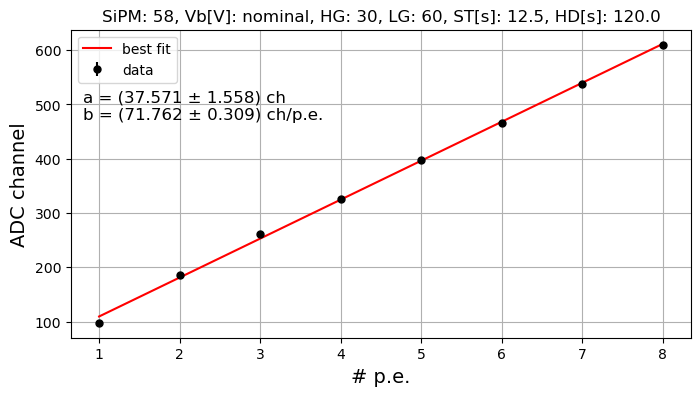

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


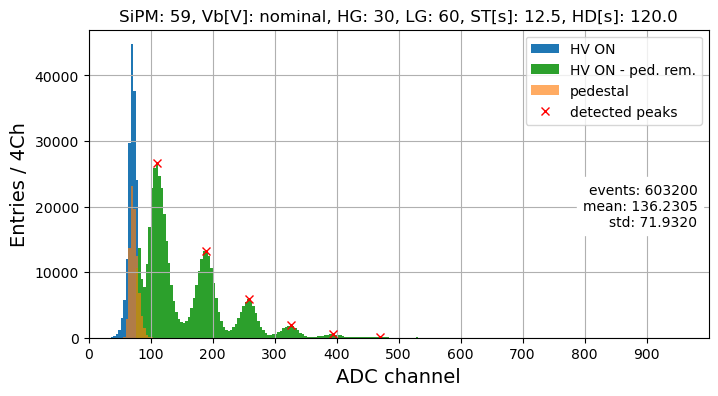

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


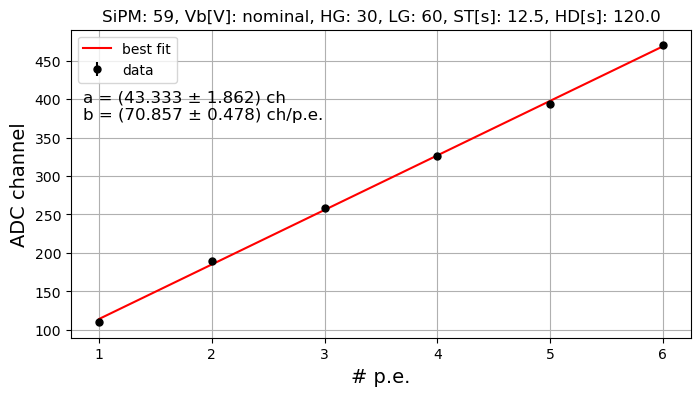

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


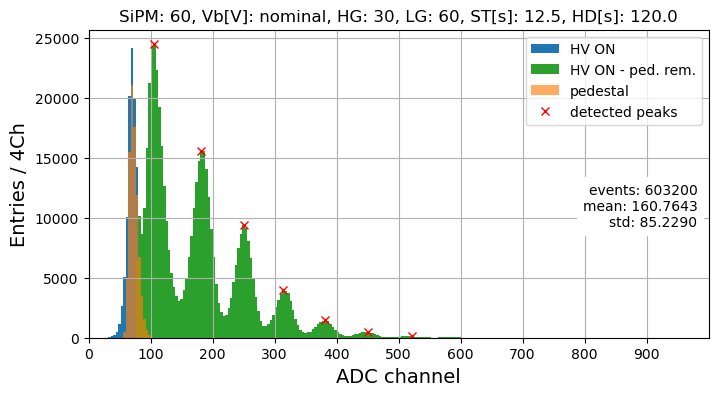

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


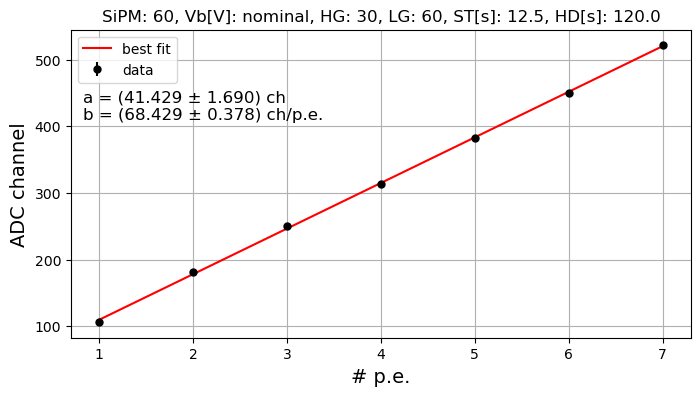

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


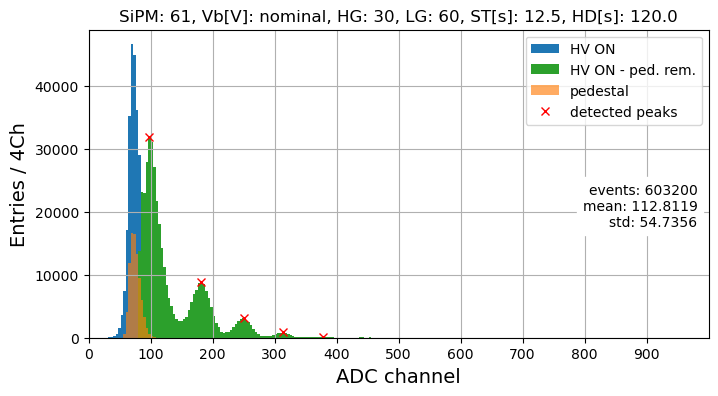

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


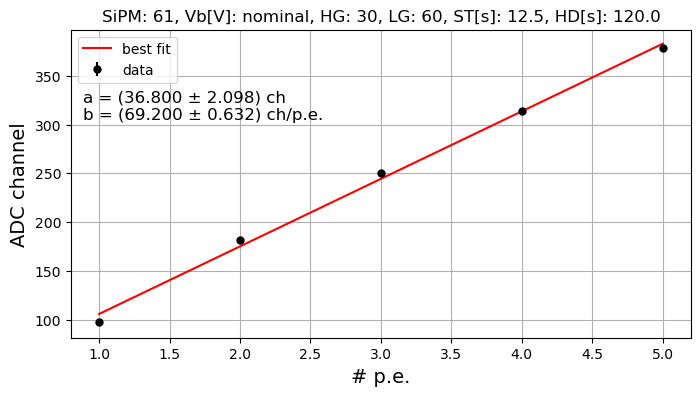

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


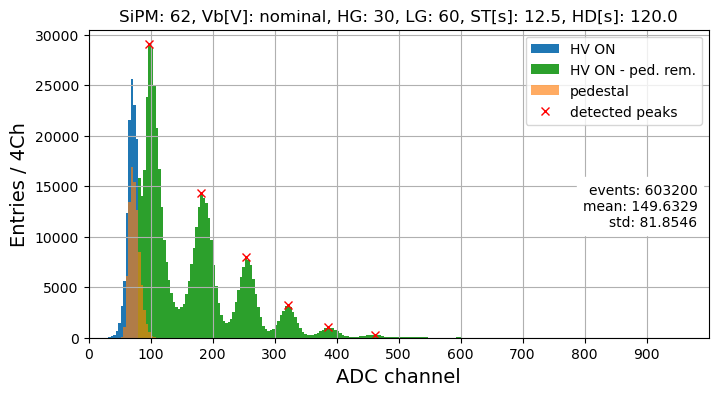

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


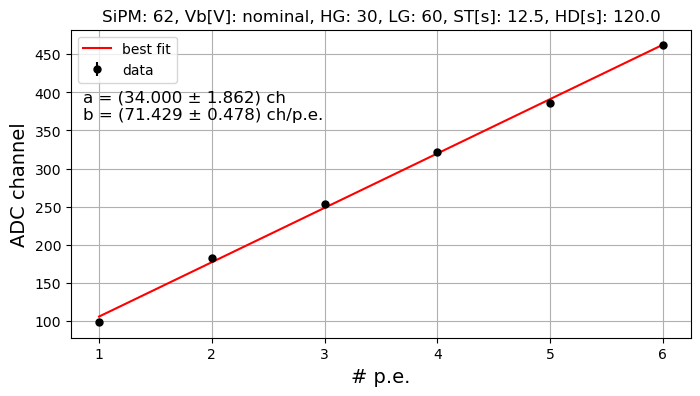

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


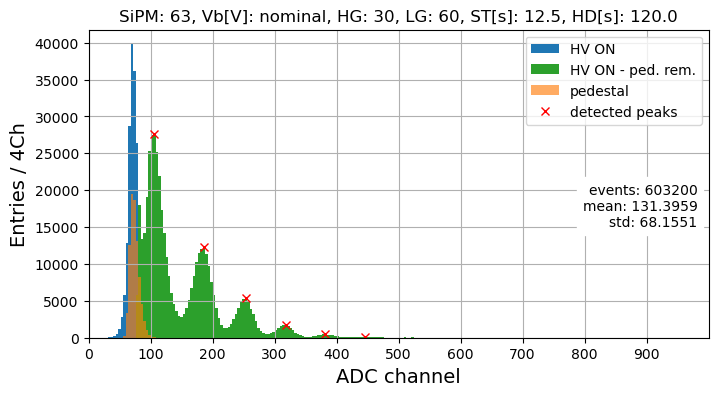

C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:61: RuntimeWarning: invalid value encountered in sqrt
  results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
C:\Users\Belle2\AppData\Local\Temp\ipykernel_16772\3242890718.py:62: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(A+'\n'+B,


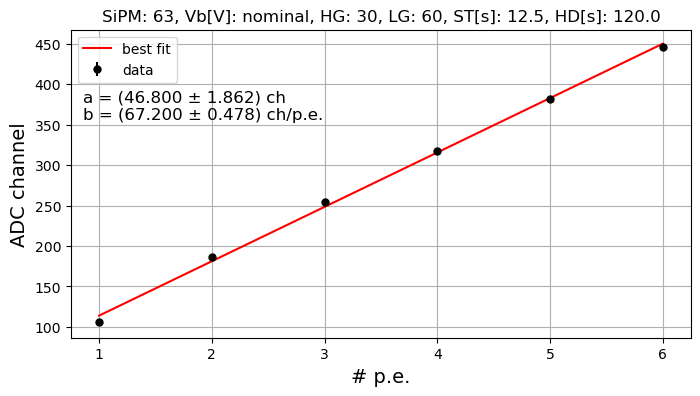

In [22]:
# stima della posizione dei picchi dei fotoelettroni

for SiPM in np.arange(0, 64, 1):
    
    dd = data.query(f'Ch=={SiPM}').HG
    dp = piedi.query(f'Ch=={SiPM}').HG

    counts = len(dd)
    mean = dd.mean()
    std = dd.std()
    bin_width = 4
    nbins = int(2**13/bin_width)
    thr=100
    results.loc[results.SiPM==SiPM, 'light_mean'] = mean
    results.loc[results.SiPM==SiPM, 'light_std'] = std
    ped_mode = results.loc[SiPM].ped_mode
    ped_std = results.loc[SiPM].ped_std

    plt.figure(figsize=(8,4))
    plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
                xy=(0.98, 0.5), xycoords='axes fraction',
                ha='right', va='top', textcoords='offset points', backgroundcolor="w",
                fontsize=10)
    plt.hist(dd, range=[0, 2**13], bins=nbins, label='HV ON')
    dds = data.query(f'Ch=={SiPM} and HG>{ped_mode+ped_std}').HG
    histogram_data, bin_edge, patch = plt.hist(dds, range=[0, 2**13], bins=nbins, label='HV ON - ped. rem.', color='C2')
    plt.hist(dp, range=[0, 2**13], bins=nbins, alpha=0.65, label='pedestal', color='C1')
    bin_centres = bin_edge[:-1]+(bin_edge[1:]-bin_edge[:-1])/2
    histogram_data_err=np.sqrt(histogram_data)
    peaks, _ = find_peaks(histogram_data, distance=int(50/bin_width), height=thr)
    plt.title(f'SiPM: {SiPM}, Vb[V]: nominal, HG: {HG_PA:.0f}, LG: {LG_PA:.0f}, ST[s]: {ShT:.1f}, HD[s]: {HD:.1f}')
    plt.plot(bin_centres[peaks], histogram_data[peaks], "x", color='red', label='detected peaks')
    plt.xlabel('ADC channel', size=14)
    plt.ylabel(f'Entries / {bin_width}Ch', size=14)
    plt.legend()
    plt.xticks(np.arange(0, 1000, 100))
    #plt.yscale('log')
    plt.grid()
    plt.xlim(0, 1000)
    plt.savefig(f'plots/calibrations/charge_{SiPM}.png', bbox_inches='tight', dpi = 150)
    plt.show()

    plt.figure(figsize=(8,4))
    ADC_peaks = bin_centres[peaks]
    ADC_peaks_err = bin_width/2*np.ones_like(ADC_peaks)
    pe = np.arange(len(ADC_peaks))+1
    plt.title(f'SiPM: {SiPM}, Vb[V]: nominal, HG: {HG_PA:.0f}, LG: {LG_PA:.0f}, ST[s]: {ShT:.1f}, HD[s]: {HD:.1f}')
    plt.errorbar(pe, ADC_peaks, yerr=ADC_peaks_err, color='black', ls='None', marker='o', markersize=5, label='data')
    popt, pcov = curve_fit(func, pe, ADC_peaks, p0=[2, 1], sigma=ADC_peaks_err, absolute_sigma=True)
    a, b = popt[0], popt[1]
    var_a, cov_ab, var_b = pcov[0,0], pcov[0,1], pcov[1,1]
    y_fit = func(pe, a, b)
    plt.plot(pe, y_fit, color='red', label='best fit')
    plt.grid()
    A = 'a = ({:.3f} ± {:.3f}) ch'.format(popt[0],np.sqrt(pcov[0,0]))
    B = 'b = ({:.3f} ± {:.3f}) ch/p.e.'.format(popt[1],np.sqrt(pcov[1,1]))
    results.loc[results.SiPM==SiPM, 'a'] = a
    results.loc[results.SiPM==SiPM, 'a_err'] = np.sqrt(var_a)
    results.loc[results.SiPM==SiPM, 'b'] = b
    results.loc[results.SiPM==SiPM, 'b_err'] = np.sqrt(var_b)
    results.loc[results.SiPM==SiPM, 'ab_cov'] = np.sqrt(cov_ab)
    plt.annotate(A+'\n'+B,
            xy=(0.02, 0.8), xycoords='axes fraction',
            ha='left', va='top', textcoords='offset points', fontsize=12)
    plt.xlabel('# p.e.', size=14)
    plt.ylabel('ADC channel', size=14)
    plt.legend()
    plt.savefig(f'plots/calibrations/calibration_{SiPM}.png', bbox_inches='tight', dpi = 150)
    plt.show()